# Analyzing data from Experiments with Cross-lingual transfer

## **Introduction**

In Natural Language Processing (NLP), languages are categorized based on the availability of linguistic resources:

- **High-Resource Languages:** Languages like English, Spanish, and Chinese, which have abundant linguistic data, including extensive text corpora, annotated datasets, and comprehensive computational tools. This wealth of resources facilitates the development of effective NLP applications such as machine translation, sentiment analysis, and speech recognition.

- **Low-Resource Languages:** Languages that lack extensive data and funding, making it challenging to develop effective NLP applications.

To bridge the gap between high-resource and low-resource languages, **knowledge transfer** is employed. This involves leveraging knowledge gained from one domain or language to improve performance in another. In cross-lingual transfer, models trained on high-resource languages are adapted to perform tasks in low-resource languages, enhancing NLP capabilities where data is scarce.

**Multilingual Models** play a pivotal role in this process. Trained on data from multiple languages simultaneously, they learn shared representations across languages, allowing for effective cross-lingual transfer. This shared understanding enables the model to apply knowledge from high-resource languages to low-resource ones, improving performance in tasks such as machine translation and language understanding.

Understanding the factors that influence the effectiveness of cross-lingual data transfer is crucial for optimizing multilingual models, especially for low-resource languages. This study aims to investigate how variables such as language contamination, linguistic distances, and script differences between source and target languages influence the efficiency of cross-lingual knowledge transfer. By analyzing these factors, we seek to identify key determinants that facilitate or hinder a model's ability to generalize and perform effectively in new linguistic contexts, thereby providing insights to enhance multilingual model performance.

We leverage a key metric, **data transfer**, proposed by Souza et al. (2024), to quantify how effectively a model utilizes pretraining knowledge when fine-tuned for a target language.

The central focus of this work is to investigate how linguistic and dataset-related factors contribute to variations in this metric. Specifically, we examine the roles of:

- **Language Contamination:** The overlap of sentences between source and target datasets.

- **Linguistic Distances:** Pre-computed measures of syntactic, phonological, and genetic differences.

- **Script Differences:** Captured through the Unicode encoding system, more specifically, UTF-8.

Previous work in cross-lingual transfer learning suggests that language similarity, contamination, and script differences significantly influence model performance.

**Language Similarity:**
Lin et al. (2024) introduced mPLM-Sim, a measure assessing language similarities using multilingual pretrained language models. Their findings indicate that mPLM-Sim correlates with linguistic similarity measures and can effectively select source languages to enhance zero-shot cross-lingual transfer performance.

**Language Contamination:**
Blevins and Zettlemoyer (2022) explored how unintended inclusion of non-English data during pretraining affects cross-lingual transfer. They discovered that even minimal amounts of non-English text in the training data can significantly improve a model's performance in other languages, highlighting the impact of language contamination on cross-lingual capabilities.

**Script Differences and Tokenization:**
Rust et al. (2021) examined the impact of tokenization on multilingual language models. Their study found that designated monolingual tokenizers play a crucial role in downstream performance, especially for languages with unique scripts. Replacing a multilingual tokenizer with a specialized monolingual one improved performance across various tasks and languages.

In this context, we aim to analyze the results from the experiments performed by De Souza et al. (2024) to test the hypothesis that these aspects contribute to the variability of the data transfer metric.


### **Formulation of Hypothesis and Variables**

To systematically investigate the factors influencing cross-lingual data transfer efficiency, we define the following components:

**Hypothesis:**

The effectiveness of cross-lingual data transfer is significantly influenced by:

1. **Language Contamination:** The proportion of overlapping sentences between source and target datasets.

2. **Linguistic Distances:** Quantitative measures of syntactic, phonological, and genetic differences between source and target languages.

3. **Script Differences:** Variations in writing systems, as indicated by the different UTF-8 encondings in source and target datasets.

**Variables:**

- **Dependent Variable:**

  - *Data Transfer Efficiency:* Quantified by the metric proposed by De Souza et al. (2024), measuring how effectively a model utilizes pretraining knowledge when fine-tuned for a target language.

- **Independent Variables:**

  1. *Language Contamination:*

     - `detected_language_ratio`: Proportion of sentences in the source dataset that are in the target language.

     - `detected_language_ratio_on_target`: Proportion of sentences in the target dataset that are in the source language.

  2. *Linguistic Distances:*

     - `syntactic_distance`: Measure of syntactic differences between languages.

     - `phonological_distance`: Measure of phonological differences.

     - `genetic_distance`: Measure of genetic relationship between languages.

  3. *Script Differences:*

     - `token2text_rate_square_difference`: Difference in Unicode token-to-text ratios between languages.

**Scope of Study:**

This study focuses on analyzing the impact of the aforementioned variables on the efficiency of cross-lingual data transfer. By employing statistical analyses, we aim to identify key determinants that facilitate or hinder a model's ability to generalize across languages. The findings are expected to provide insights into optimizing multilingual models, particularly for low-resource languages.

By clearly defining the hypothesis and variables, we establish a structured framework for investigating the factors affecting cross-lingual data transfer efficiency. 

## Exploratory Data Analysis

Conducting an Exploratory Data Analysis (EDA) is essential to understand the characteristics of the selected dataset and to identify patterns, anomalies, or relationships among variables. This process will inform subsequent statistical analyses and model development.


### Data Overview

First, we explore the following:

- Summary Statistics: Calculate basic statistics such as mean, median, standard deviation, and range for each variable to understand their central tendencies and dispersions.

- Data Types and Missing Values: Identify the data type of each variable (e.g., numerical, categorical) and detect any missing or null values.

In [1]:
import pandas as pd


dataset = pd.read_csv("../results/language_transfer_data.csv")
dataset.head()


,Unnamed: 0,model_size,source,source_data_size,source_train_epochs,target,target_data_size,target_train_epochs,target_data_size_as_int,perplexity,...,original_text_length_target,text_length_after_truncation_target,num_of_tokens_target,original_num_of_tokens_target,token2text_rate_target,token2text_rate_square_difference,sentence_count,detected_language_ratio,sentence_count_on_target,detected_language_ratio_on_target
0,0,small,ru,6B,1.0,ar,6B,3.0,6000000000,1.930613,...,3428995010,3428994107,6001000448,6001002076,1.750076,1.588865e-05,287.0,0.000014,5986.0,0.000259
1,1,small,en,6B,1.0,ru,189M,10.0,189000000,1.914023,...,107902824,107900562,189267968,189272011,1.754096,5.589543e-01,22861.0,0.000729,3925.0,0.000198
2,2,small,pt,6B,1.0,es,6M,10.0,6000000,2.909573,...,6728686,6700439,6815744,6844685,1.017209,1.771758e-04,243876.0,0.006952,78.0,0.000002
3,3,small,ru,6B,1.0,ru,189M,10.0,189000000,1.834884,...,107902824,107900562,189267968,189272011,1.754096,1.163986e-09,15761521.0,0.793612,502812.0,0.025317
4,4,small,ru,6B,1.0,en,6B,3.0,6000000000,2.572163,...,5962461873,5962460480,6001000448,6001001843,1.006464,5.589033e-01,126909.0,0.006390,22861.0,0.000729


In [2]:
dataset.tail()

,Unnamed: 0,model_size,source,source_data_size,source_train_epochs,target,target_data_size,target_train_epochs,target_data_size_as_int,perplexity,...,original_text_length_target,text_length_after_truncation_target,num_of_tokens_target,original_num_of_tokens_target,token2text_rate_target,token2text_rate_square_difference,sentence_count,detected_language_ratio,sentence_count_on_target,detected_language_ratio_on_target
685,685,small,fi,600M,1.0,ru,6M,10.0,6000000,2.613188,...,3889628,3886035,6815744,6822406,1.753907,0.511747,1102.0,0.000032,NaN,0.000000e+00
686,686,small,zh,6B,1.0,es,6M,10.0,6000000,3.752540,...,6728686,6700439,6815744,6844685,1.017209,2.083950,2794.0,0.000144,3.0,9.187129e-08
687,687,small,zh,6B,1.0,ko,189M,10.0,189000000,2.543149,...,93085692,93078486,189267968,189282734,2.033423,0.182649,9498.0,0.000490,587.0,2.494456e-05
688,688,small,ar,6B,3.0,ja,6M,10.0,6000000,3.741110,...,2887043,2886837,6815744,6816230,2.360973,0.373195,1939.0,0.000084,NaN,0.000000e+00
689,689,small,id,600M,1.0,zh,6M,10.0,6000000,4.702209,...,2816936,2815777,6815744,6819149,2.420555,2.008379,152.0,0.000004,NaN,0.000000e+00


In [3]:
dataset.shape

(690, 42)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           690 non-null    int64  
 1   model_size                           690 non-null    object 
 2   source                               690 non-null    object 
 3   source_data_size                     690 non-null    object 
 4   source_train_epochs                  690 non-null    float64
 5   target                               690 non-null    object 
 6   target_data_size                     690 non-null    object 
 7   target_train_epochs                  690 non-null    float64
 8   target_data_size_as_int              690 non-null    int64  
 9   perplexity                           690 non-null    float64
 10  data_effective                       690 non-null    float64
 11  data_transfer                   

In [5]:
dataset.isnull().sum()

Unnamed: 0                               0
model_size                               0
source                                   0
source_data_size                         0
source_train_epochs                      0
target                                   0
target_data_size                         0
target_train_epochs                      0
target_data_size_as_int                  0
perplexity                               0
data_effective                           0
data_transfer                            0
fraction_of_effective_dt                 0
cross_lingual                            0
data_transfer_formatted                  0
data_finetune_formatted                  0
data_effective_formatted                 0
syntactic_distance                       0
geographic_distance                      0
phonological_distance                    0
genetic_distance                         0
inventory_distance                       0
featural_distance                        0
data_split 

The dataset contains many columns. For simplicity, we'll filter only the ones we are intereset in. We also filter only experiments where source and target languages differ:

In [6]:
dataset = dataset[dataset["cross_lingual"] == True][
    [
        "source",
        "target",
        "source_data_size",
        "target_data_size",
        "target_data_size_as_int",
        "model_size",
        "perplexity",
        "data_transfer",
        "data_effective",
        "fraction_of_effective_dt",
        "syntactic_distance",
        "geographic_distance",
        "detected_language_ratio",
        "detected_language_ratio_on_target",
        "token2text_rate_square_difference",
    ]
]

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 633 entries, 0 to 689
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   source                             633 non-null    object 
 1   target                             633 non-null    object 
 2   source_data_size                   633 non-null    object 
 3   target_data_size                   633 non-null    object 
 4   target_data_size_as_int            633 non-null    int64  
 5   model_size                         633 non-null    object 
 6   perplexity                         633 non-null    float64
 7   data_transfer                      633 non-null    float64
 8   data_effective                     633 non-null    float64
 9   fraction_of_effective_dt           633 non-null    float64
 10  syntactic_distance                 633 non-null    float64
 11  geographic_distance                633 non-null    float64
 12 

In [7]:
dataset.describe()

,target_data_size_as_int,perplexity,data_transfer,data_effective,fraction_of_effective_dt,syntactic_distance,geographic_distance,detected_language_ratio,detected_language_ratio_on_target,token2text_rate_square_difference
count,6.330000e+02,633.000000,6.330000e+02,6.330000e+02,633.000000,633.000000,633.000000,633.000000,6.330000e+02,6.330000e+02
mean,2.775671e+08,3.895749,5.353153e+07,3.310987e+08,0.712285,0.547457,0.565719,0.001527,3.619013e-04,6.960403e-01
std,1.143477e+09,4.332332,8.910986e+08,9.718525e+08,0.300253,0.121611,0.369198,0.005229,2.873215e-03,7.257942e-01
min,6.000000e+06,1.801898,-5.872333e+09,6.571406e+06,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.054981e-07
25%,6.000000e+06,2.776846,3.056845e+07,5.314796e+07,0.617746,0.500000,0.200000,0.000010,4.249499e-08,1.139475e-03
50%,6.000000e+06,3.472920,5.240529e+07,7.527314e+07,0.867274,0.570000,0.500000,0.000058,3.674852e-07,5.189687e-01
75%,6.000000e+07,3.972748,9.673699e+07,1.333567e+08,0.899585,0.610000,1.000000,0.000465,5.650088e-06,1.064126e+00
max,6.000000e+09,99.604725,5.345773e+09,5.997293e+09,0.988633,0.770000,1.000000,0.045698,4.569804e-02,2.130562e+00


In [8]:
dataset.nunique()

source                                11
target                                10
source_data_size                       3
target_data_size                       6
target_data_size_as_int                6
model_size                             1
perplexity                           633
data_transfer                        633
data_effective                       633
fraction_of_effective_dt             567
syntactic_distance                    26
geographic_distance                    8
detected_language_ratio              293
detected_language_ratio_on_target    244
token2text_rate_square_difference    501
dtype: int64

In [9]:
dataset["model_size"].unique()

array(['small'], dtype=object)

### Distribution Analysis

In this section, we examine the distribution of key variables to understand their central tendencies, dispersions, and overall patterns. This analysis provides insights into the data's structure and informs subsequent modeling decisions.



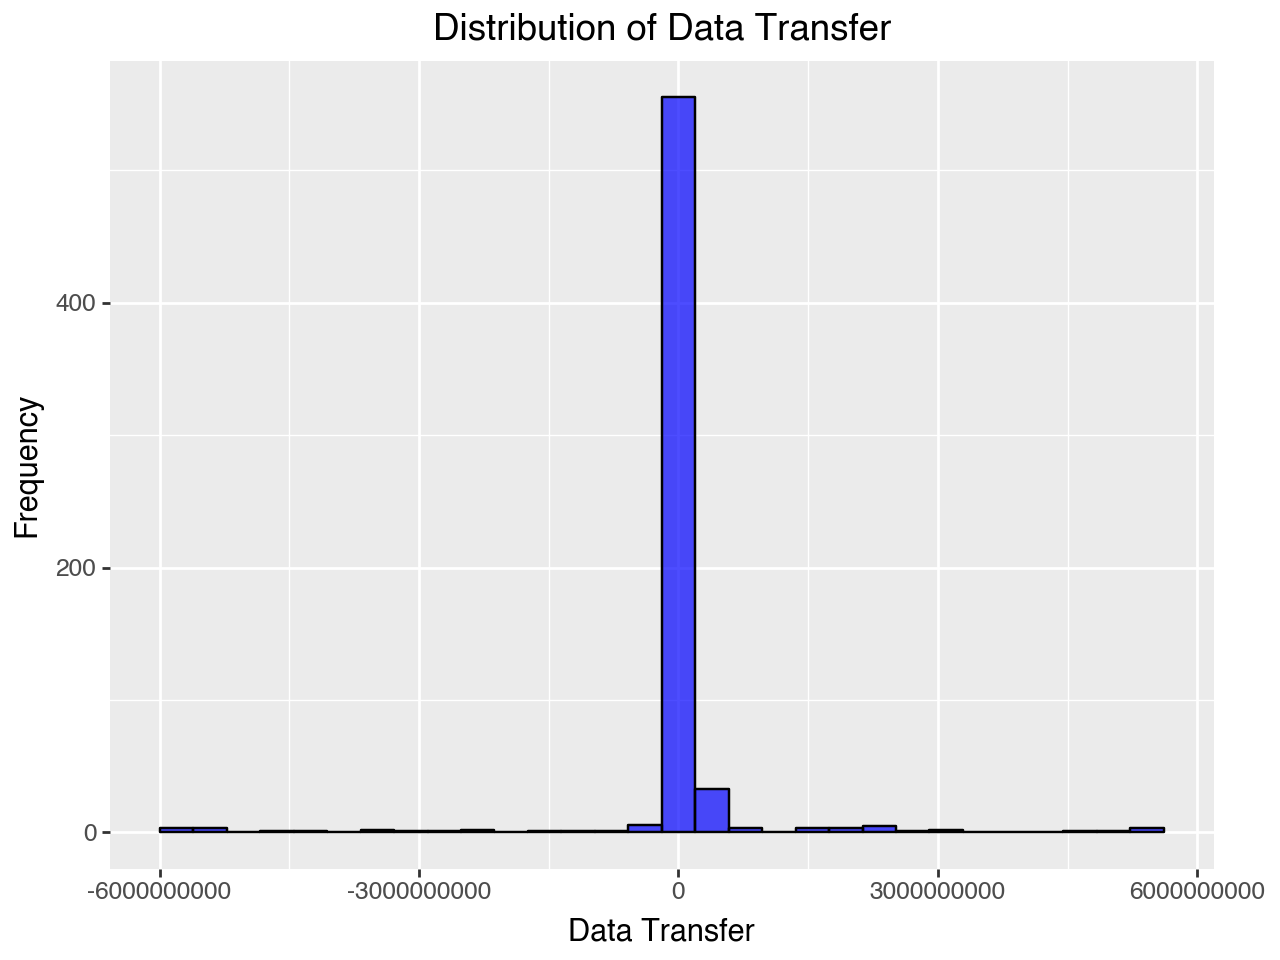

In [10]:
from plotnine import *


(
    ggplot(dataset, aes(x='data_transfer')) +
    geom_histogram(bins=30, fill='blue', color='black', alpha=0.7) +
    labs(title='Distribution of Data Transfer',
         x='Data Transfer',
         y='Frequency')
)

Data transfer has a very wide range, with very few values on the extremities. We also have the `fraction_of_effective_dt` information, which normalizes the Data Transfer metric according to the Data Effective Metric. The latter represents how much of data is used to achieve the performance on the target language (both source pretraining and finetuning on target data), while the former only accounts for information transferred from pretraining. It also represents negative values as 0, which means that not transfer was noticed.

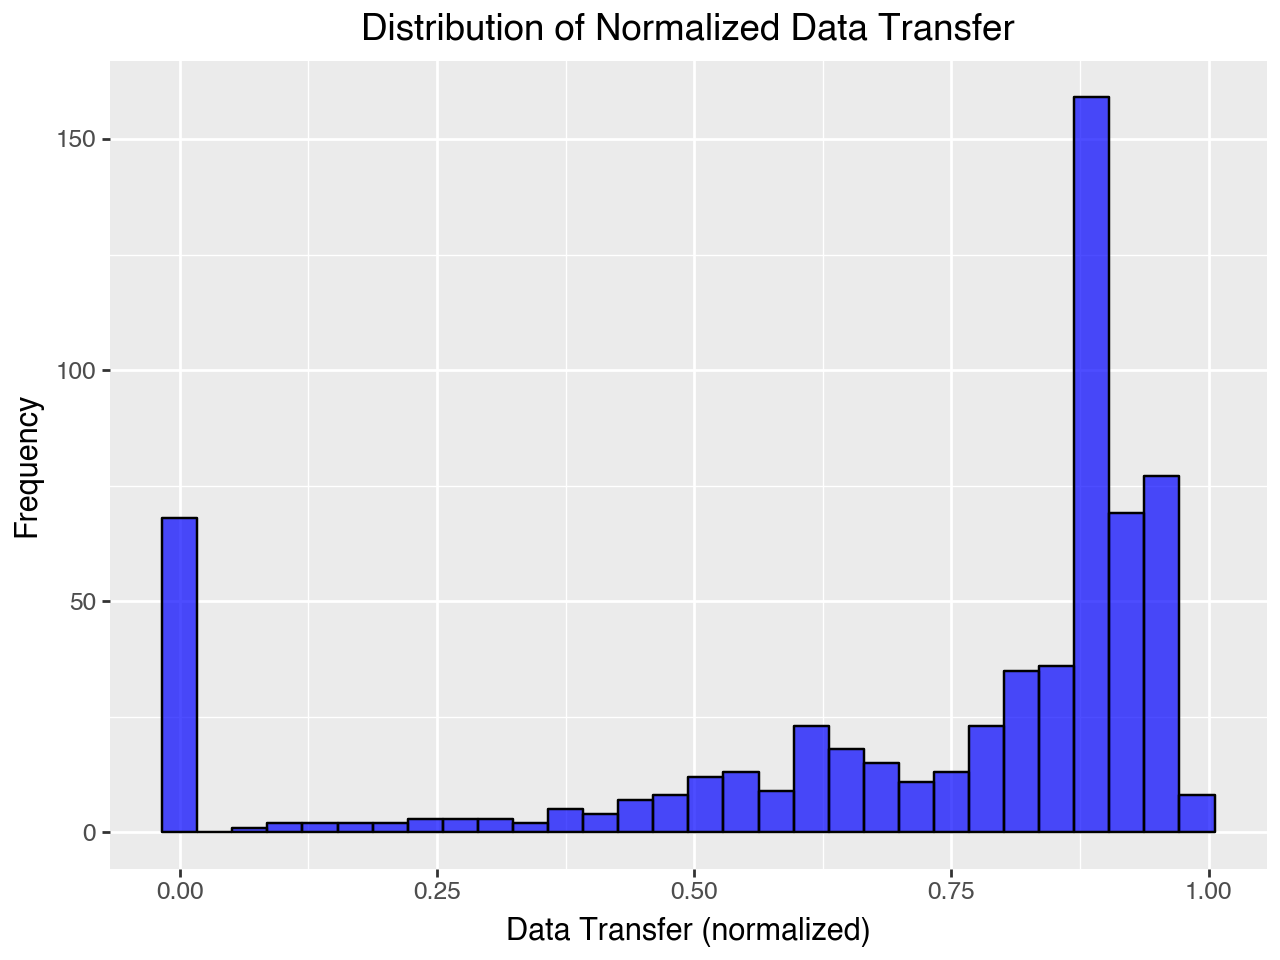

In [11]:
(
    ggplot(dataset, aes(x='fraction_of_effective_dt')) +
    geom_histogram(bins=30, fill='blue', color='black', alpha=0.7) +
    labs(title='Distribution of Normalized Data Transfer',
         x='Data Transfer (normalized)',
         y='Frequency')
)

With this metric, we seem to have a better distribution to work with, a little more spread with some concentration on the right tail (between 0.75 and 1.0).

Let's now check the distribution of the independent variables.

Another important take is that experiments were conducted with different source and language data sizes as well. Let's check how those influences the normalized data transfer:

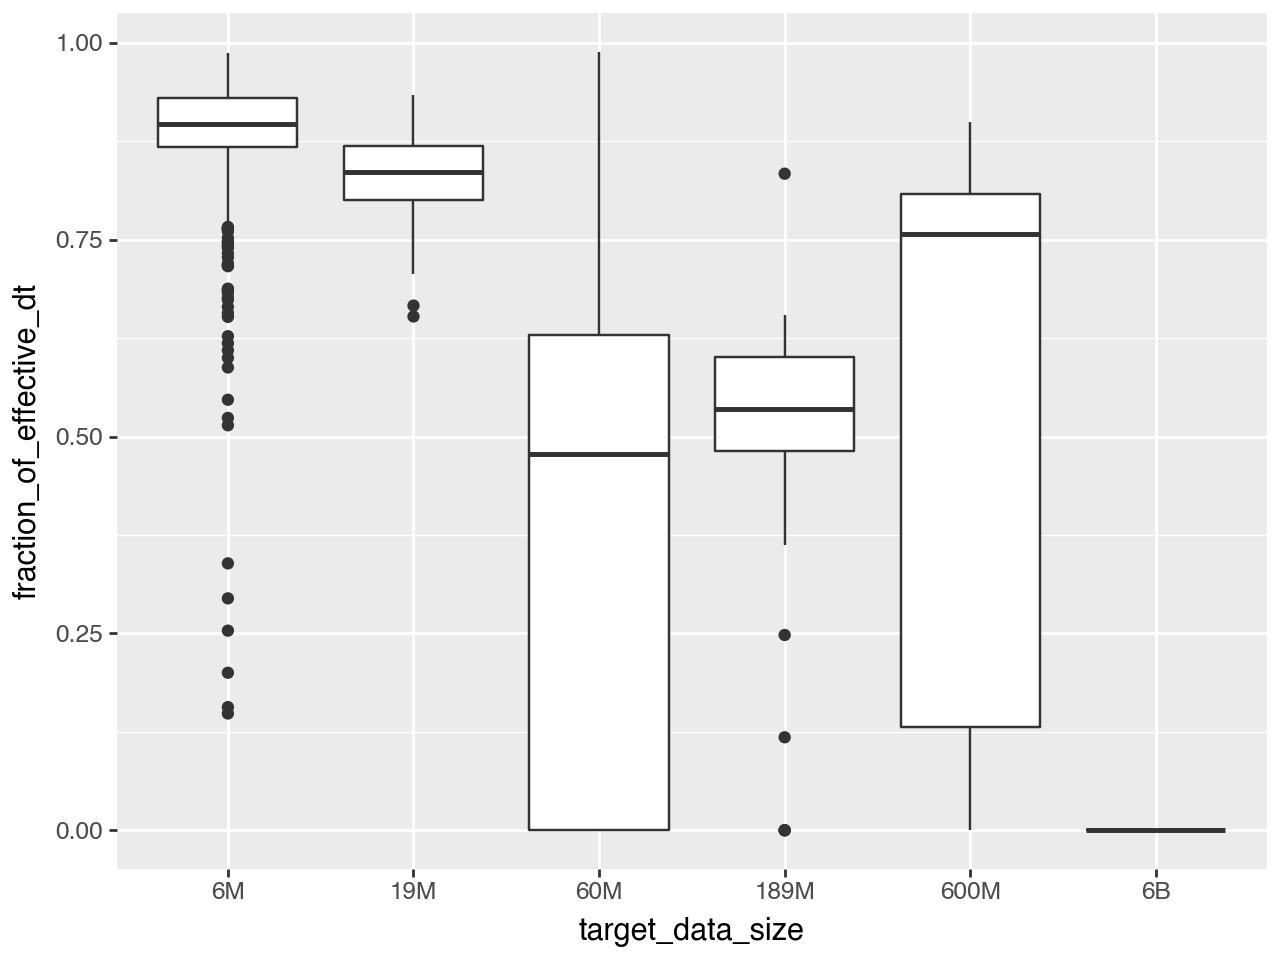

In [12]:
dataset.target_data_size = pd.Categorical(
    dataset.target_data_size,
    categories=["6M", "19M", "60M", "189M", "600M", "6B"],
    ordered=True,
)

(
    ggplot(dataset)
    + aes(y="fraction_of_effective_dt", x="target_data_size")
    + geom_boxplot()
)

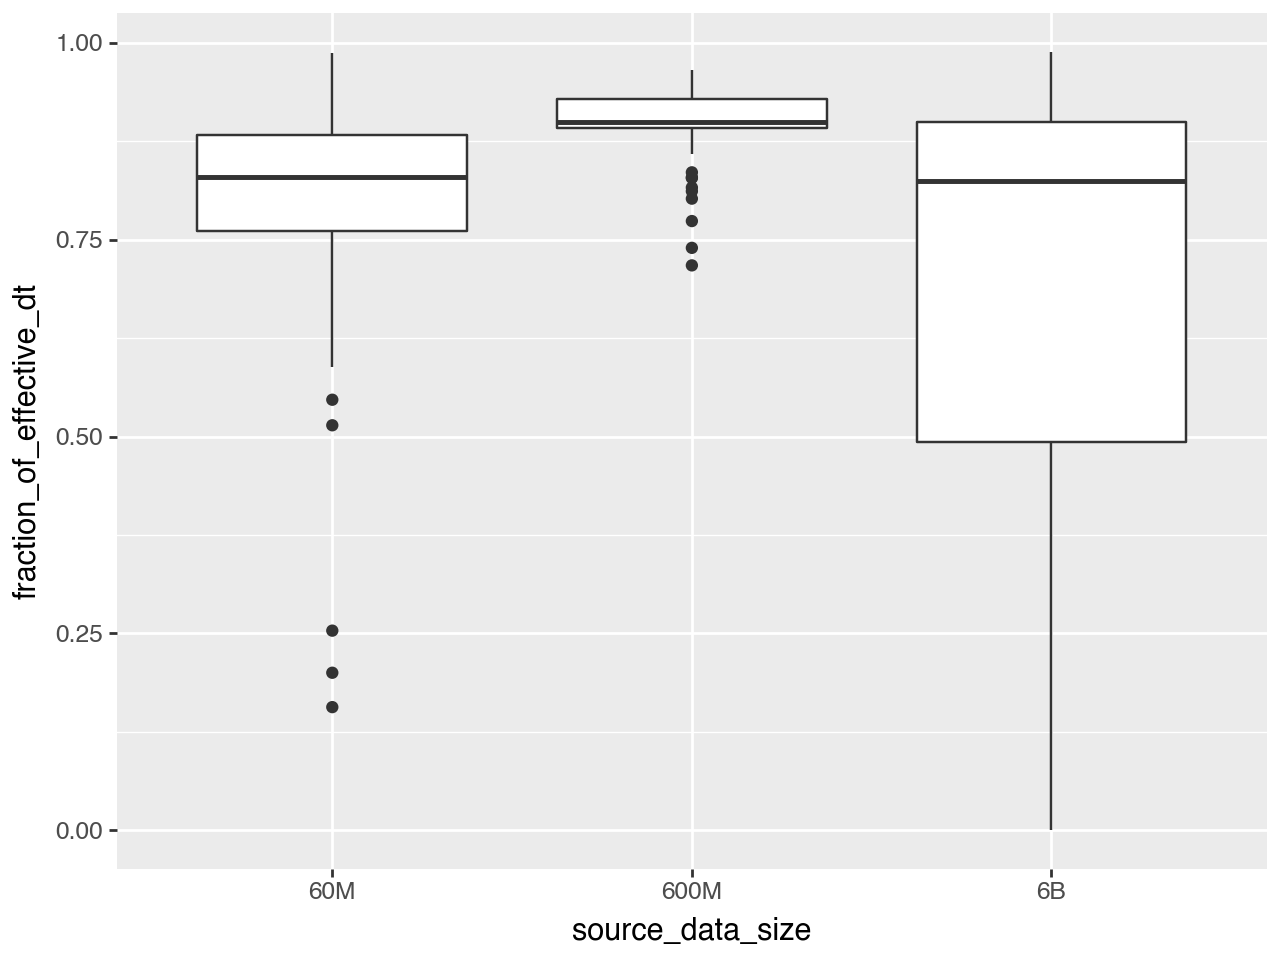

In [13]:
dataset.source_data_size = pd.Categorical(
    dataset.source_data_size,
    categories=["6M", "19M", "60M", "189M", "600M", "6B"],
    ordered=True,
)

(
    ggplot(dataset)
    + aes(y="fraction_of_effective_dt", x="source_data_size")
    + geom_boxplot()
)

Based on those observations, we see that `fraction_of_effective_dt` is more sensible to the amount of data on the target language we give the model. This does not clear when we look in the source dataset sizes. We have diffrent pretraining regimes with 60M and 600M and they yield very similar results. For the 6B data size in the source language, we see more variation, but the median is still very close to other pretraining setups.

#### Language Contamination

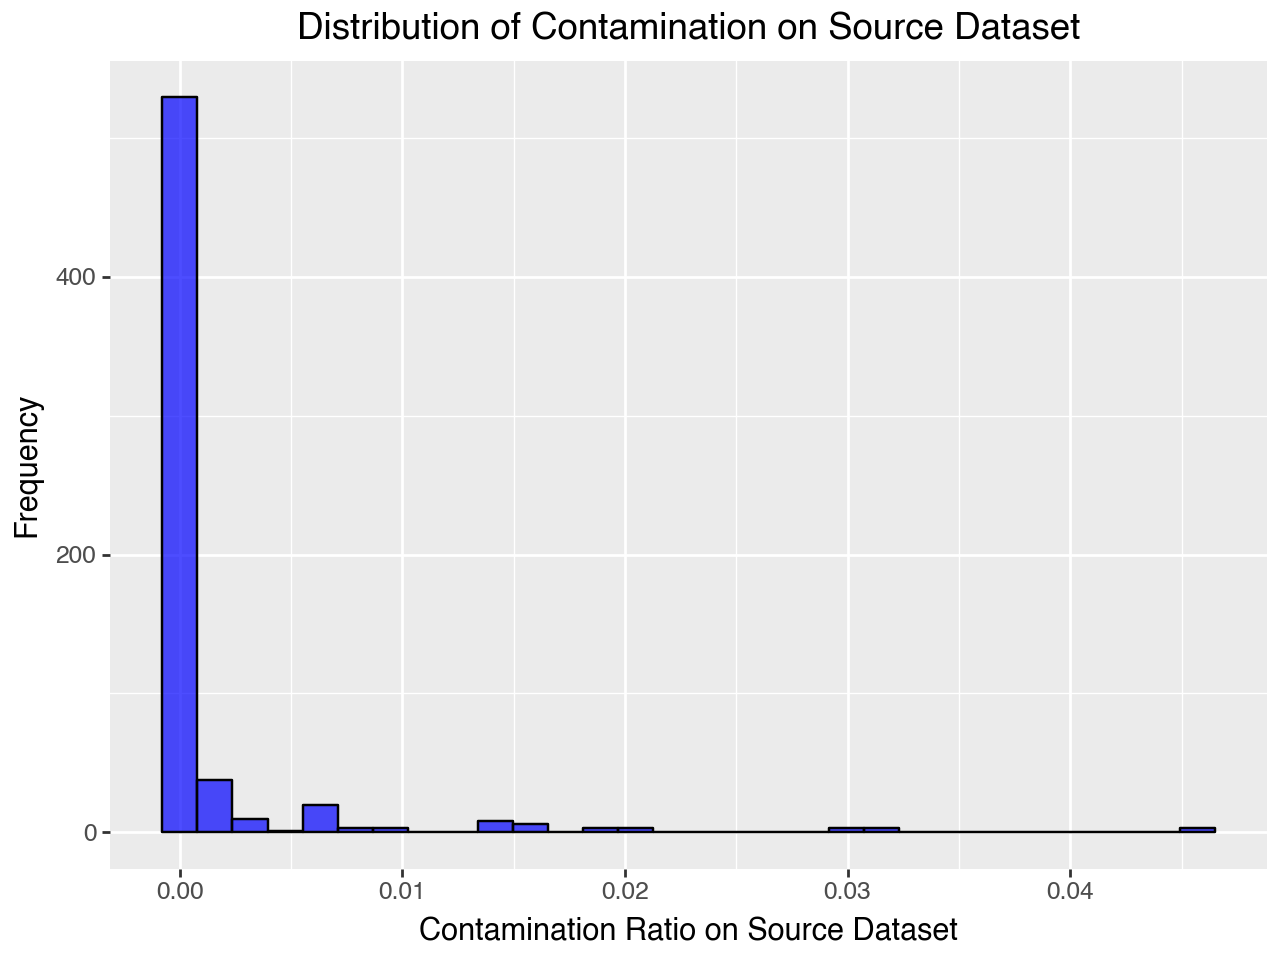

In [14]:
(
    ggplot(dataset, aes(x='detected_language_ratio')) +
    geom_histogram(bins=30, fill='blue', color='black', alpha=0.7) +
    labs(title='Distribution of Contamination on Source Dataset',
         x='Contamination Ratio on Source Dataset',
         y='Frequency')
)

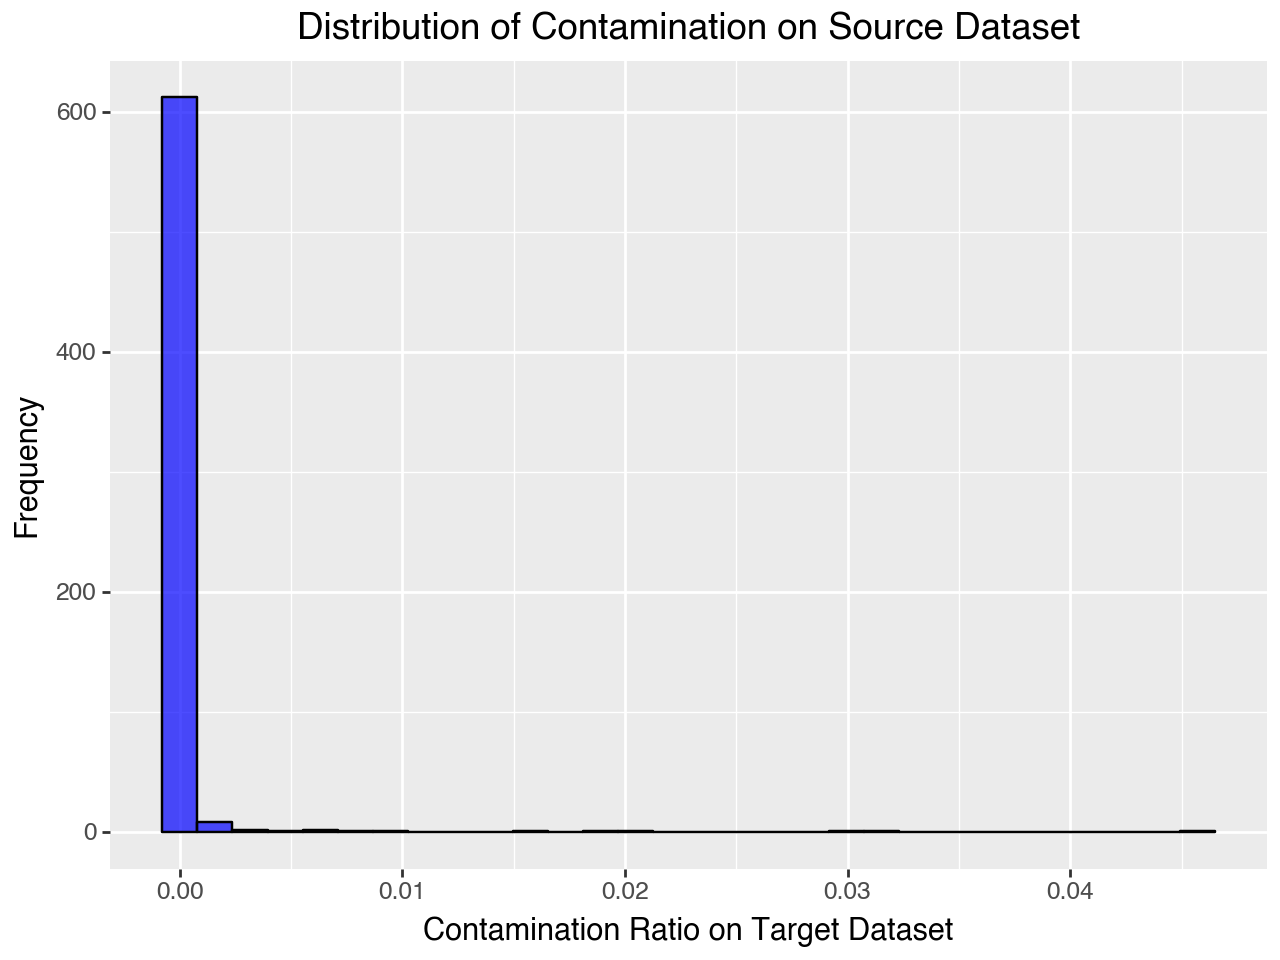

In [15]:
(
    ggplot(dataset, aes(x='detected_language_ratio_on_target')) +
    geom_histogram(bins=30, fill='blue', color='black', alpha=0.7) +
    labs(title='Distribution of Contamination on Source Dataset',
         x='Contamination Ratio on Target Dataset',
         y='Frequency')
)

Both contamination ratios are very close to 0, indicating that we see little presence of sentences from one language in another's dataset. Let's try zomming in by increasing the number of bins.

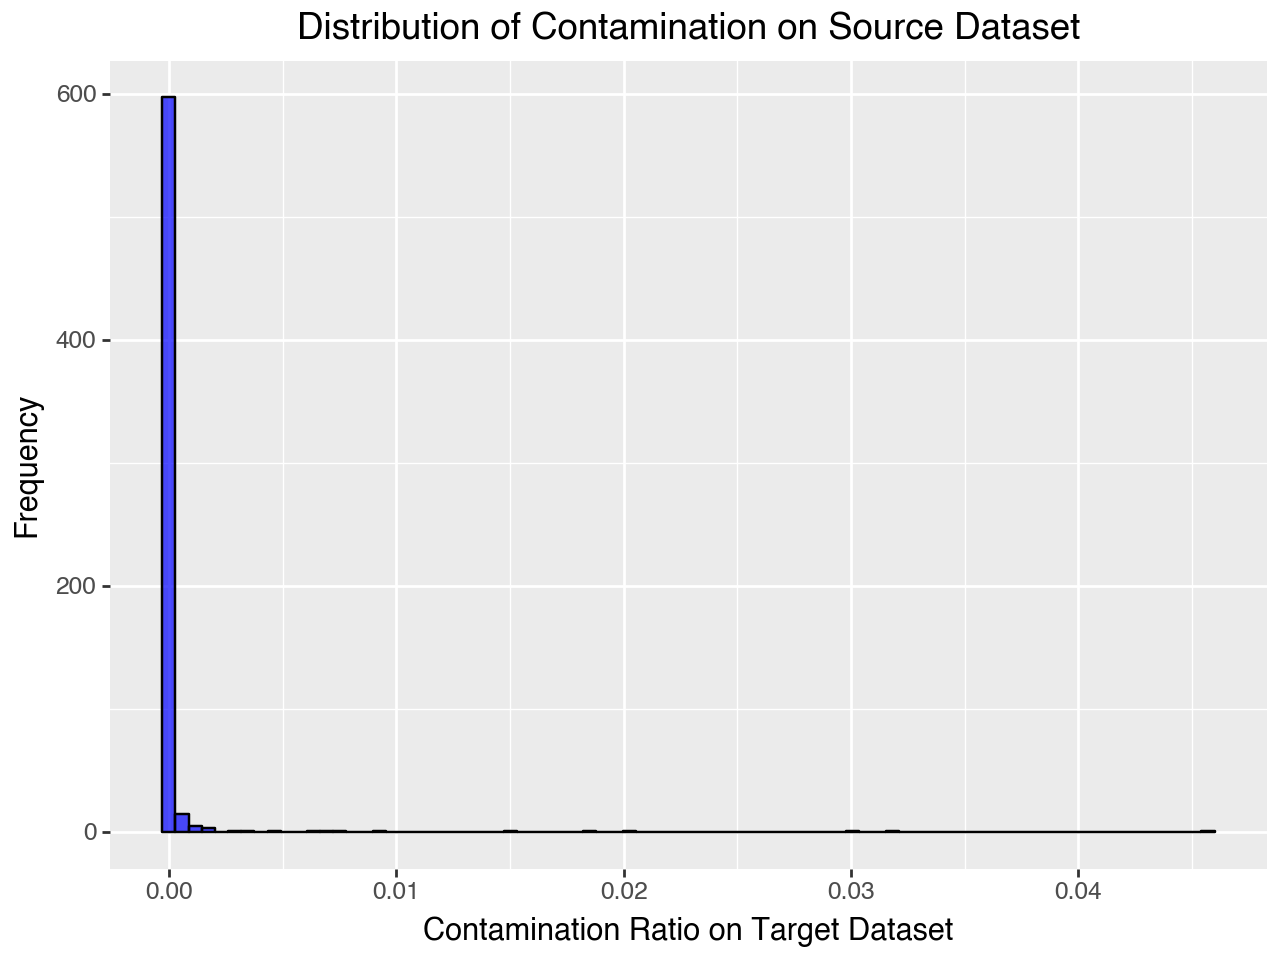

In [16]:
(
    ggplot(dataset, aes(x='detected_language_ratio_on_target')) +
    geom_histogram(bins=80, fill='blue', color='black', alpha=0.7) +
    labs(title='Distribution of Contamination on Source Dataset',
         x='Contamination Ratio on Target Dataset',
         y='Frequency')
)

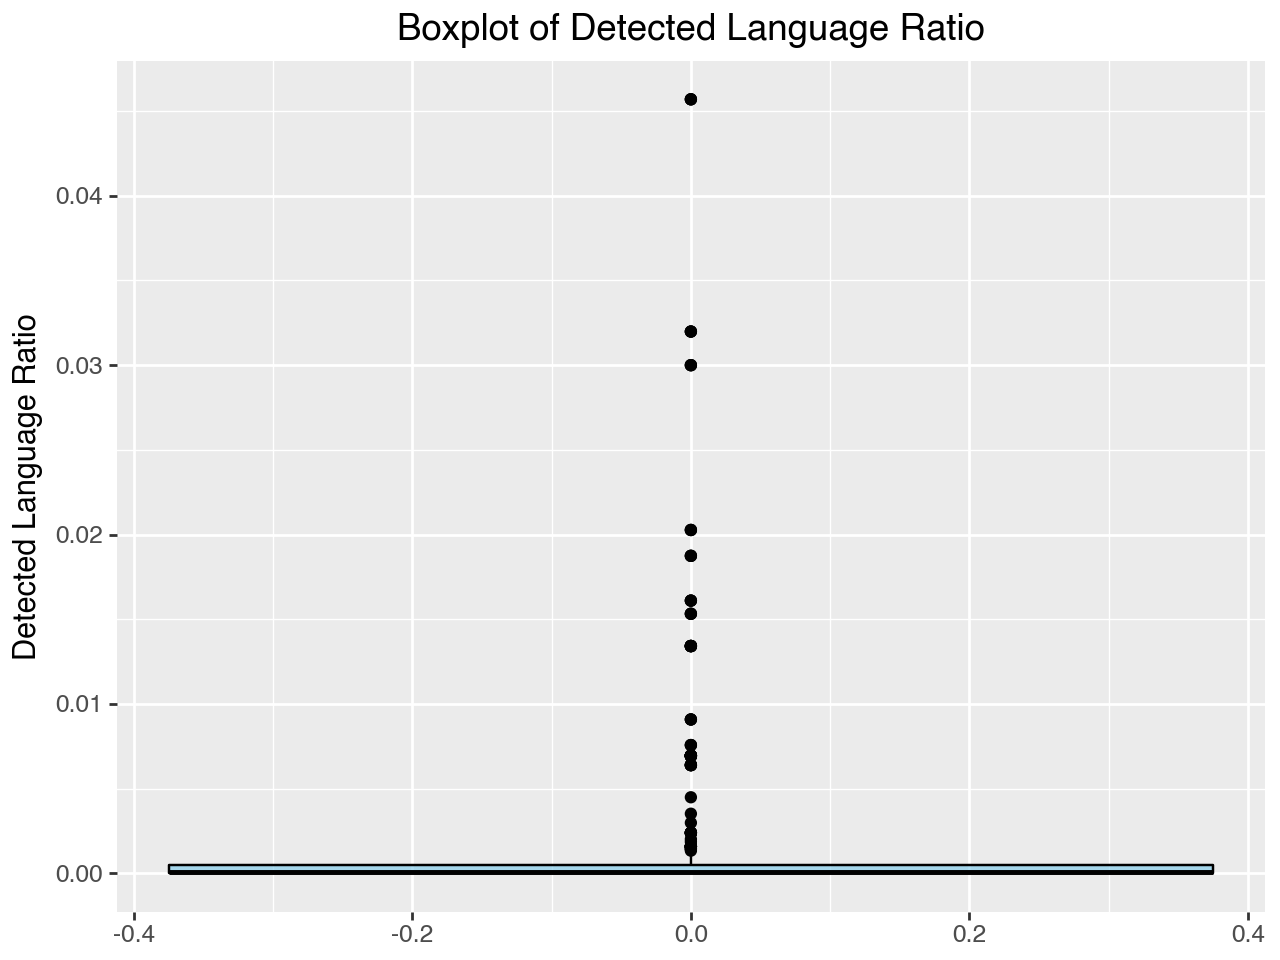

In [17]:
(
    ggplot(dataset, aes(y='detected_language_ratio')) +
    geom_boxplot(fill='skyblue', color='black', alpha=0.7) +
    labs(title='Boxplot of Detected Language Ratio',
         y='Detected Language Ratio')
)

In [18]:
dataset.describe()[["detected_language_ratio", "detected_language_ratio_on_target"]]

,detected_language_ratio,detected_language_ratio_on_target
count,633.000000,6.330000e+02
mean,0.001527,3.619013e-04
std,0.005229,2.873215e-03
min,0.000000,0.000000e+00
25%,0.000010,4.249499e-08
50%,0.000058,3.674852e-07
75%,0.000465,5.650088e-06
max,0.045698,4.569804e-02


#### Language Distances

In fact, if we plot a boxplot, we can confirm that values are very concetrated close to 0. Variation is low. in both cases the max value would be something like 4%.

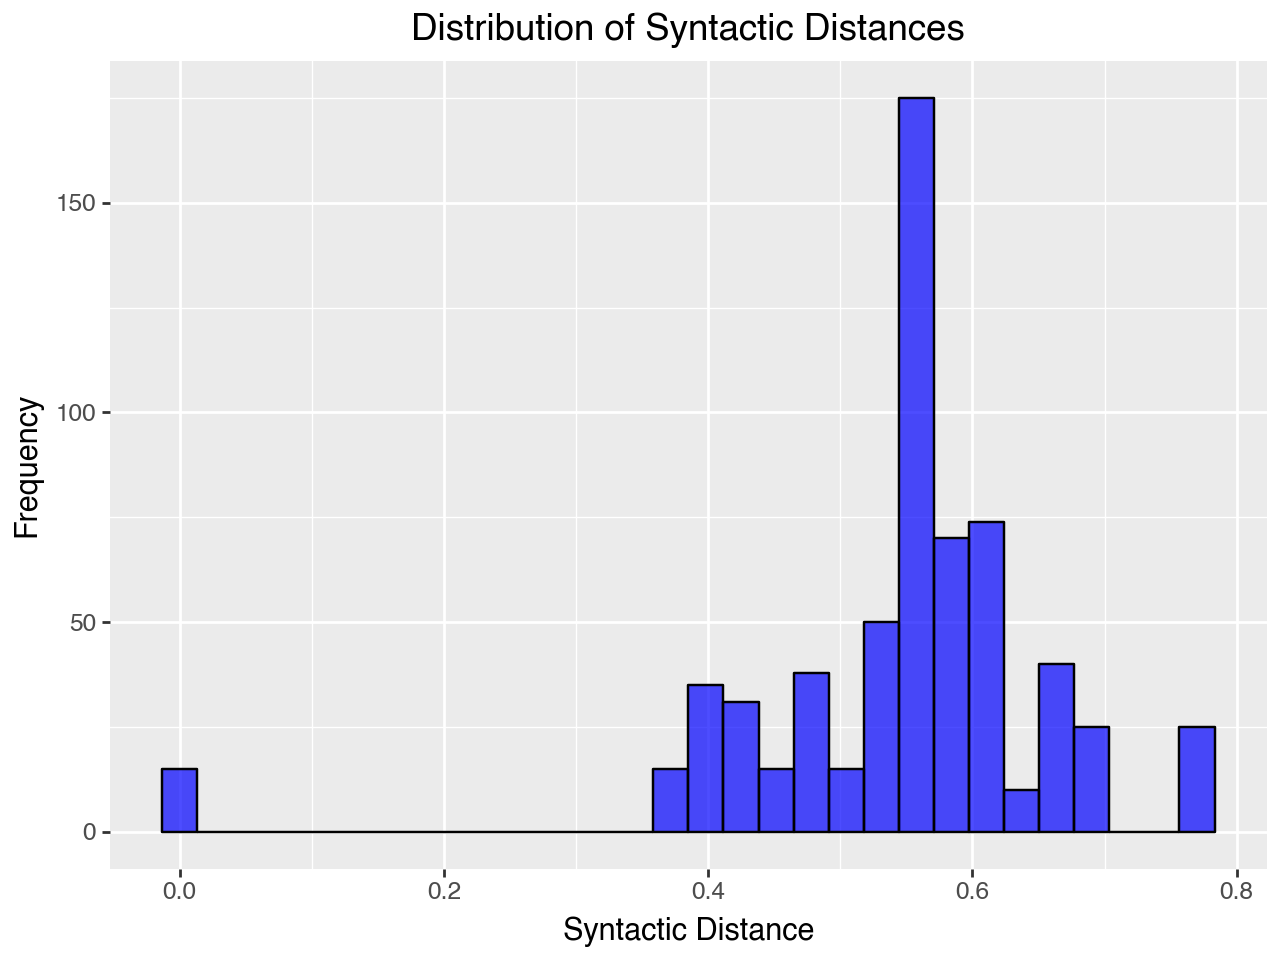

In [40]:
(
    ggplot(dataset, aes(x='syntactic_distance')) +
    geom_histogram(bins=30, fill='blue', color='black', alpha=0.7) +
    labs(title='Distribution of Syntactic Distances',
         x='Syntactic Distance',
         y='Frequency')
)

For syntactic distances, we see something resembling a normal distribution. Most of values are between 0.4 and 0.8. Since the distances varies from 0 to 1, we can see that most languages are not that close. We do have some languages very close to each other, however:

In [ ]:
dataset[dataset["syntactic_distance"] < 0.2][["source", "target"]].drop_duplicates()

,source,target
106,zh,ar
111,ar,zh


Chinese and Arabic seems to be very close per our dataset. It seems a little counter-intuitive, so this would require a little more investigation.
Now, let's check the Geographical distances:

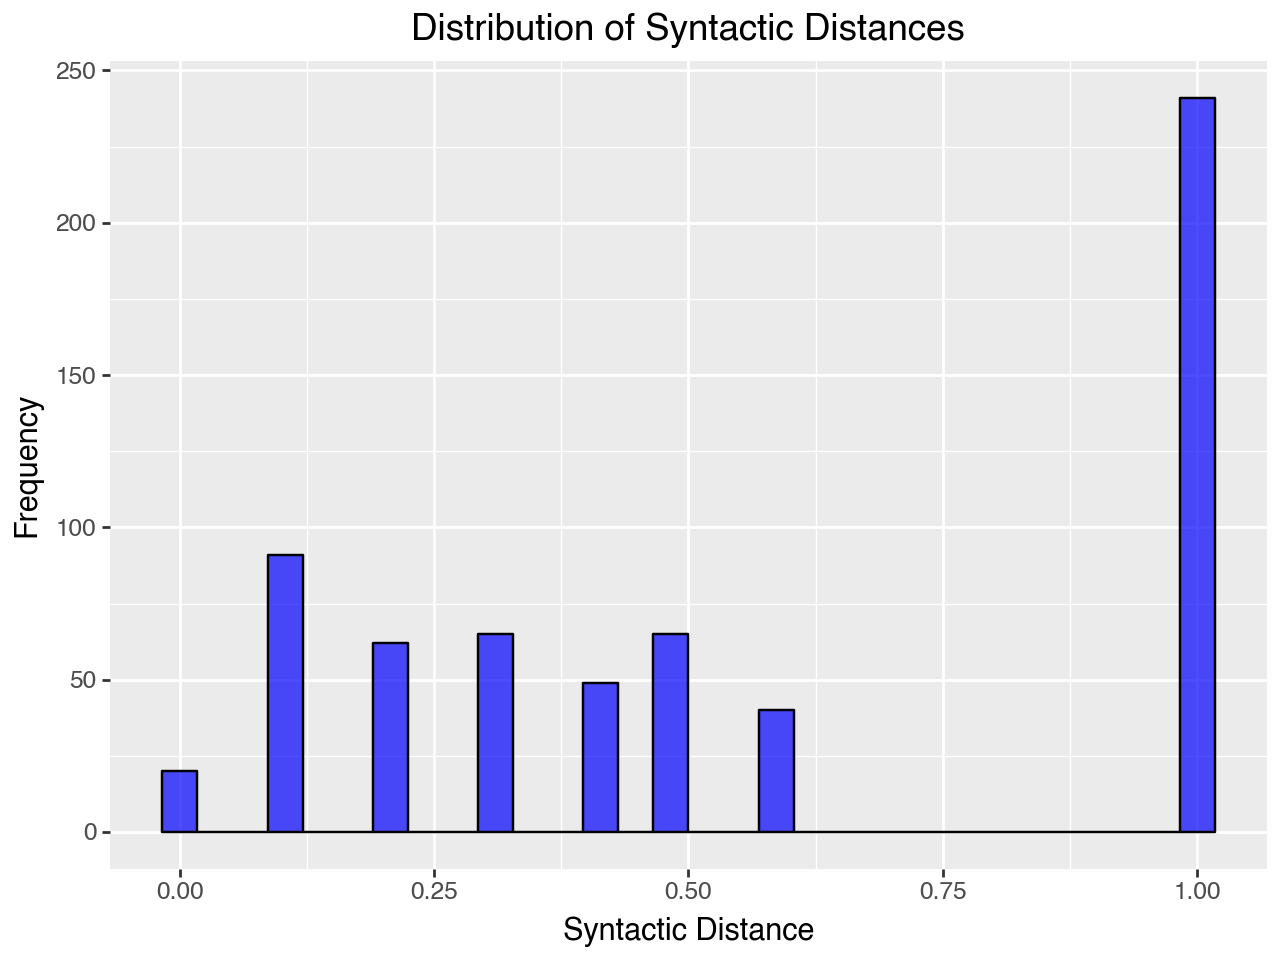

In [ ]:
(
    ggplot(dataset, aes(x='geographic_distance')) +
    geom_histogram(bins=30, fill='blue', color='black', alpha=0.7) +
    labs(title='Distribution of Syntactic Distances',
         x='Syntactic Distance',
         y='Frequency')
)

For geographical distances, we see a more spread pattern. We have many languages very distant from each other (1.0), but also languages that originate more closely:

In [ ]:
dataset[dataset["geographic_distance"] > 0.8][["source", "target", "geographic_distance"]].drop_duplicates()

,source,target,geographic_distance
0,ru,ar,1.0
9,en,ar,1.0
14,ru,zh,1.0
16,en,zh,1.0
93,ko,zh,1.0
101,zh,ko,1.0
103,zh,ru,1.0
105,ar,ja,1.0
106,zh,ar,1.0
107,zh,de,1.0


In [ ]:
dataset[dataset["geographic_distance"] < 0.5][["source", "target", "geographic_distance"]].drop_duplicates()

,source,target,geographic_distance
1,en,ru,0.2
2,pt,es,0.0
4,ru,en,0.2
7,en,es,0.1
8,ru,ja,0.3
10,ru,de,0.2
13,en,fi,0.1
21,ru,es,0.3
25,ru,id,0.4
37,en,de,0.1


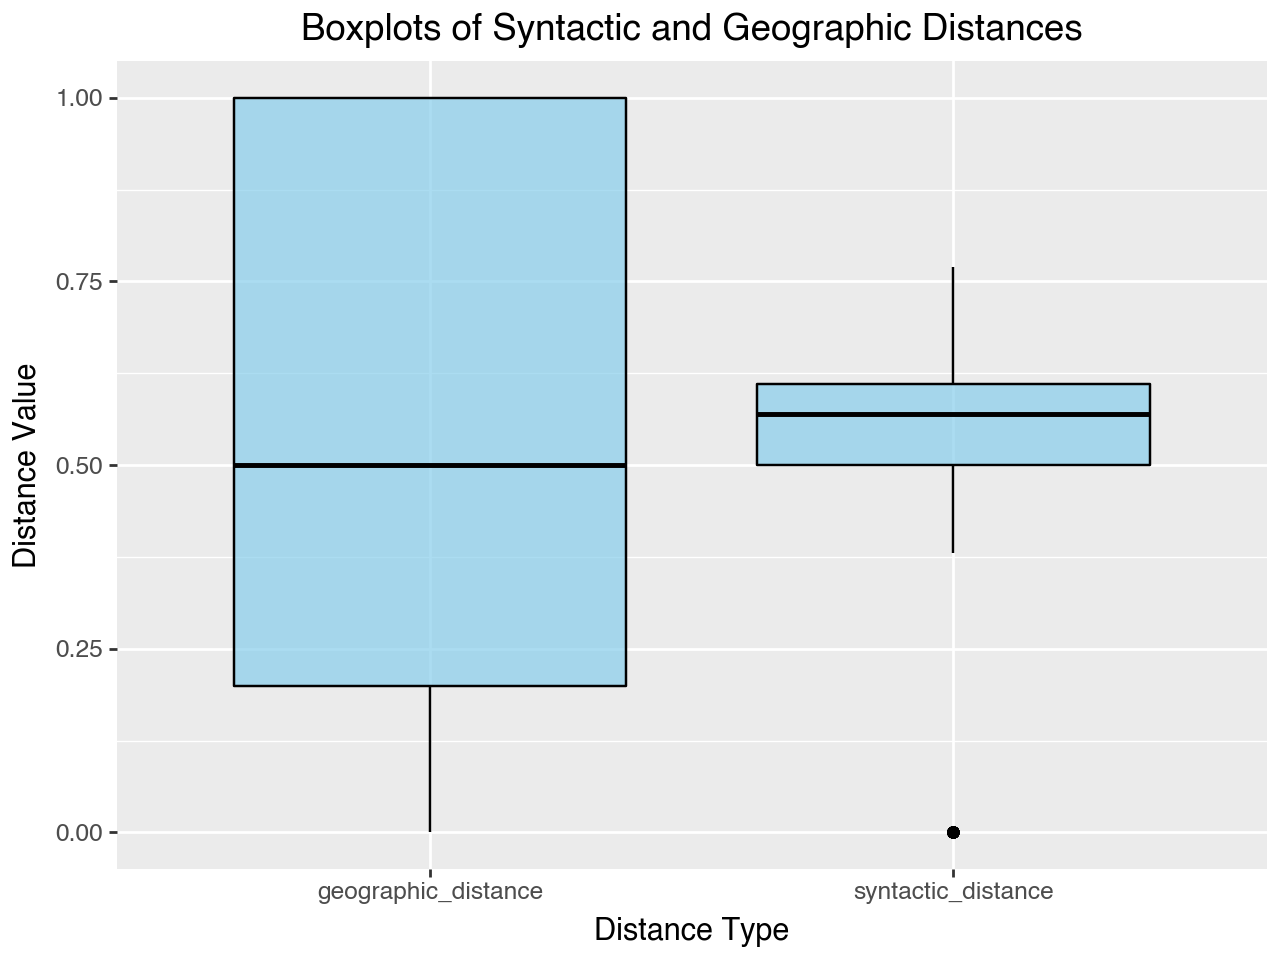

In [ ]:
df_distances = pd.melt(
    dataset,
    value_vars=["syntactic_distance", "geographic_distance"],
    var_name="Distance_Type",
    value_name="Distance_Value",
)


(
    ggplot(df_distances, aes(x="Distance_Type", y="Distance_Value"))
    + geom_boxplot(fill="skyblue", color="black", alpha=0.7)
    + labs(
        title="Boxplots of Syntactic and Geographic Distances",
        x="Distance Type",
        y="Distance Value",
    )
)

#### Script impact

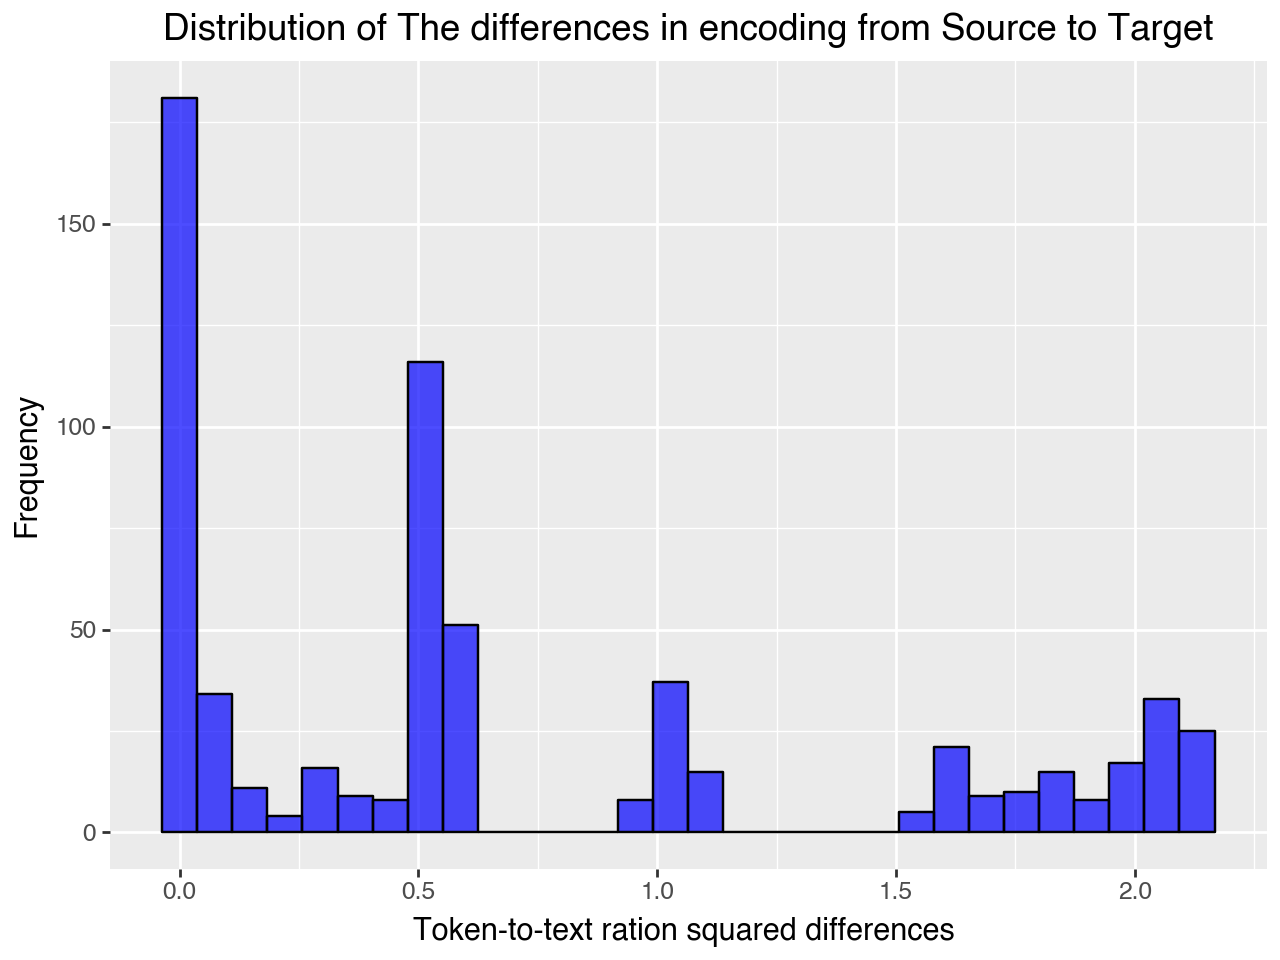

In [ ]:
(
    ggplot(dataset, aes(x='token2text_rate_square_difference')) +
    geom_histogram(bins=30, fill='blue', color='black', alpha=0.7) +
    labs(title='Distribution of The differences in encoding from Source to Target',
         x='Token-to-text ration squared differences ',
         y='Frequency')
)

For the differences between encodings in source and target, we see that we have a fair amount of similar languages. The language selection benefits languagues with latin script. The languages with greater differences are:

In [ ]:
dataset[dataset["token2text_rate_square_difference"] > 1.5][
    ["source", "target", "token2text_rate_square_difference"]
].sort_values(by="token2text_rate_square_difference", ascending=False)

,source,target,token2text_rate_square_difference
262,zh,id,2.130562
477,id,zh,2.130459
122,zh,en,2.125479
401,zh,id,2.124265
134,zh,id,2.124060
...,...,...,...
143,ja,fi,1.577457
666,ja,fi,1.575503
420,pt,ja,1.551833
663,ja,fi,1.537871


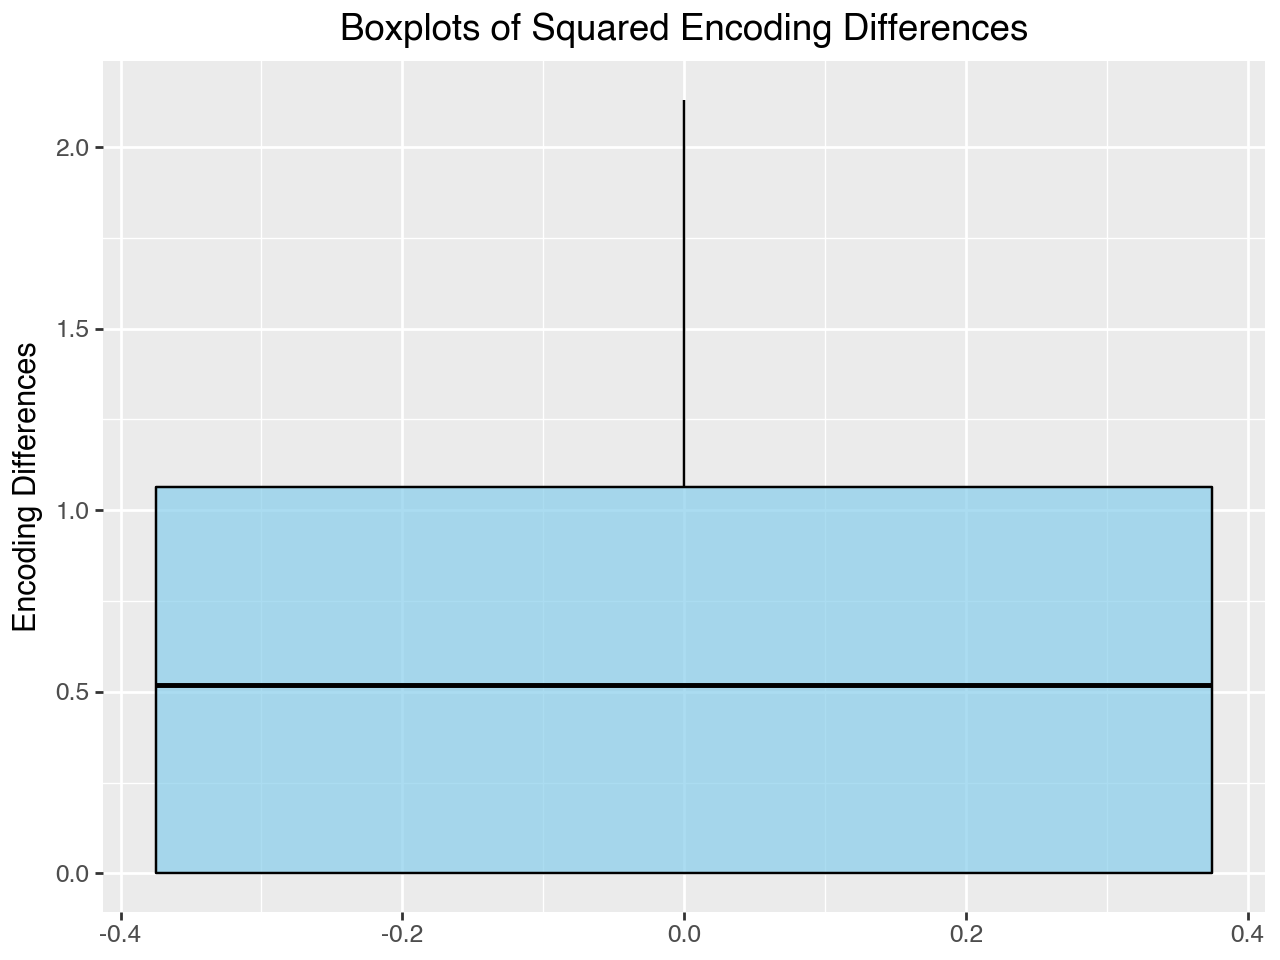

In [39]:
(
    ggplot(dataset, aes(y='token2text_rate_square_difference'))
    + geom_boxplot(fill="skyblue", color="black", alpha=0.7)
    + labs(
        title="Boxplots of Squared Encoding Differences",
        y="Encoding Differences",
    )
)

### Correlation Analysis

Now we are more aware of what makes the Data Transfer to vary, we'll look into the correlation of the dependent variable to all independent variable we highlighted:

- **Language Contamination**
- **Language Distances**
- **Script differences**

First, let's explore how each variable correlate with each other:

In [ ]:
correlation_matrix = dataset.select_dtypes(include=['number']).corr().reset_index()
correlation_matrix.head()

,index,target_data_size_as_int,perplexity,data_transfer,data_effective,fraction_of_effective_dt,syntactic_distance,geographic_distance,detected_language_ratio,detected_language_ratio_on_target,token2text_rate_square_difference
0,target_data_size_as_int,1.000000,-0.080579,-0.567789,0.655985,-0.498338,-0.059085,0.035776,-0.000996,0.542875,0.040407
1,perplexity,-0.080579,1.000000,0.132538,0.026717,0.012975,0.044130,0.061430,-0.042436,-0.045375,0.148947
2,data_transfer,-0.567789,0.132538,1.000000,0.248849,0.356167,-0.043395,-0.093911,0.024464,-0.448655,-0.046109
3,data_effective,0.655985,0.026717,0.248849,1.000000,-0.259769,-0.109309,-0.044014,0.021259,0.227369,0.005266
4,fraction_of_effective_dt,-0.498338,0.012975,0.356167,-0.259769,1.000000,-0.023014,-0.110009,0.085169,-0.270376,-0.175856


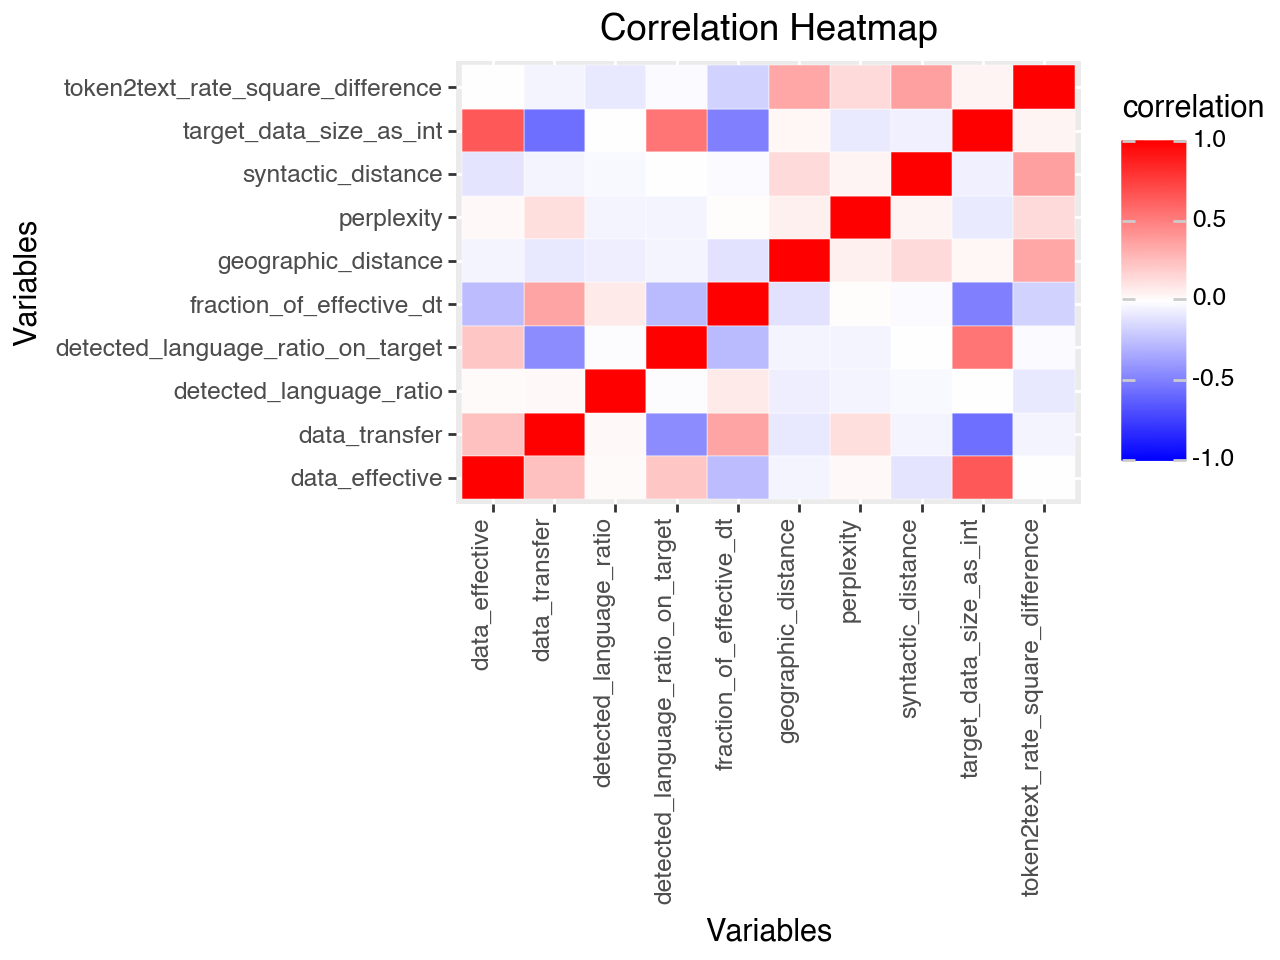

In [ ]:
correlation_matrix_norm = pd.melt(correlation_matrix, id_vars="index", var_name="variable", value_name="correlation")
(
    ggplot(correlation_matrix_norm, aes(x='index', y='variable', fill='correlation')) +
    geom_tile(color='white') +
    scale_fill_gradient2(low='blue', mid='white', high='red', midpoint=0, limits=(-1, 1)) +
    theme(axis_text_x=element_text(rotation=90, hjust=1)) +
    labs(title='Correlation Heatmap', x='Variables', y='Variables')
)

Upon analyzing the dataset, several notable relationships emerge:

**Expected Relationships:**

- **Token-to-Text Rate Square Difference vs. Syntactic and Geographic Distances:** Languages utilizing different scripts tend to exhibit greater syntactic and geographic distances.

- **Fraction of Effective Data Transfer vs. Data Transfer and Data Effective:** These variables are inherently related, as they are derived from one another.

**Subtler Relationships:**

- **Fraction of Effective Data Transfer vs. Detected Language Ratio:** A weak yet significant correlation suggests that cross-lingual transfer is influenced by the presence of target language sentences in the source language training data.

- **Fraction of Effective Data Transfer vs. Detected Language Ratio:** A negative correlation indicates that a higher proportion of source language sentences in the target dataset corresponds to reduced transfer, implying less reliance on pretraining information.

- **Fraction of Effective Data Transfer vs. Geographic Distance:** A weaker negative correlation suggests that as the geographic distance between languages increases, the effectiveness of transfer diminishes.

- **Fraction of Effective Data Transfer vs. Token-to-Text Rate Square Difference:** Similarly, a weaker negative correlation indicates that greater script differences between languages are associated with reduced transfer effectiveness.

These observations warrant a deeper exploration of our variable of interest. 

In this analysis, we examine the Pearson correlation, which measures the strength and direction of a linear relationship between two continuous variables. To capture both linear and non-linear monotonic relationships, we also consider the Spearman correlation, a nonparametric measure that assesses how well the relationship between two variables can be described using a monotonic function.  

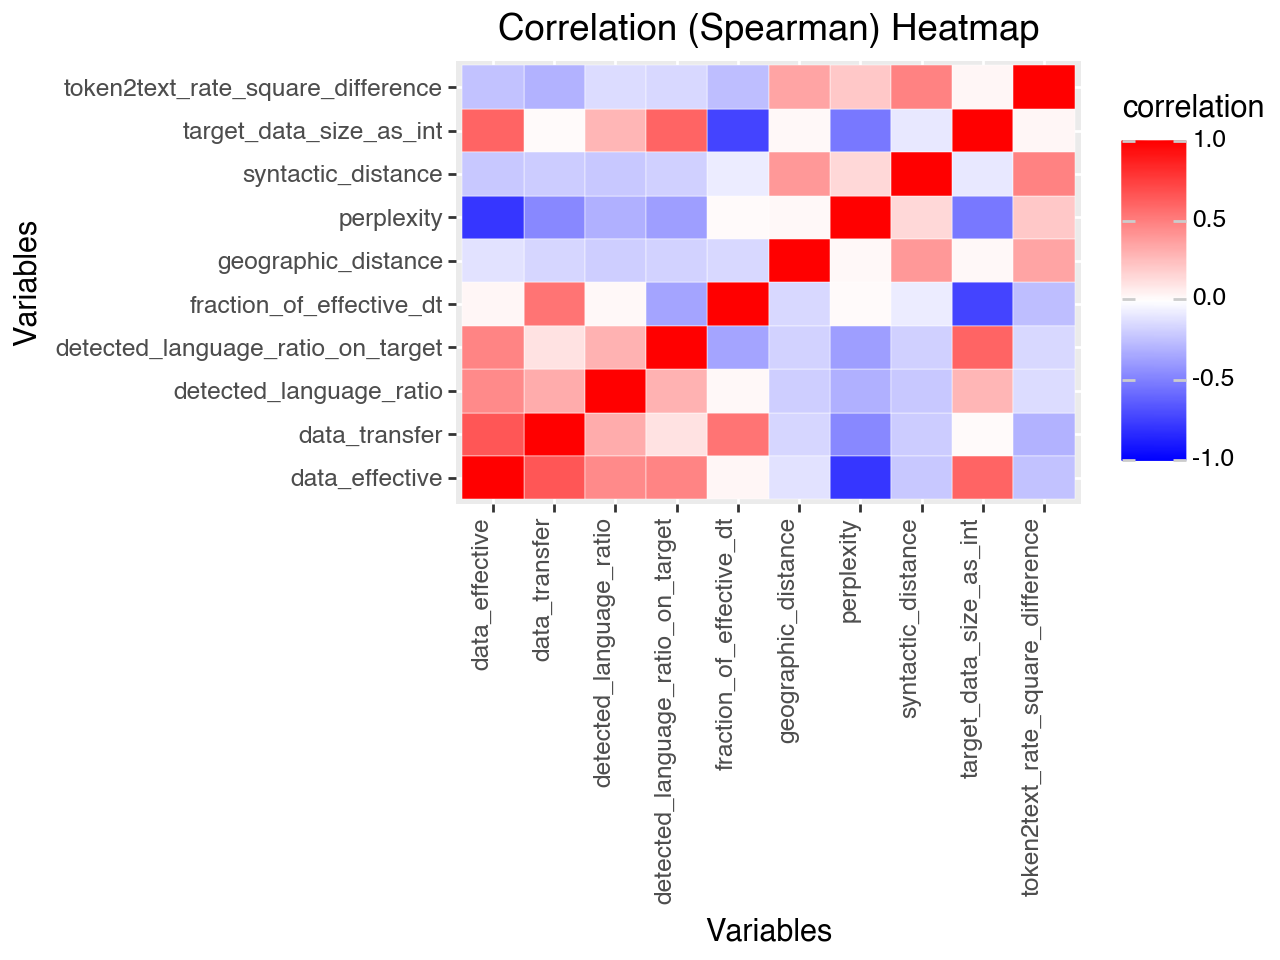

In [ ]:
correlation_matrix_sp = dataset.select_dtypes(include=['number']).corr("spearman").reset_index()
correlation_matrix_norm_sp = pd.melt(correlation_matrix_sp, id_vars="index", var_name="variable", value_name="correlation")

(
    ggplot(correlation_matrix_norm_sp, aes(x='index', y='variable', fill='correlation')) +
    geom_tile(color='white') +
    scale_fill_gradient2(low='blue', mid='white', high='red', midpoint=0, limits=(-1, 1)) +
    theme(axis_text_x=element_text(rotation=90, hjust=1)) +
    labs(title='Correlation (Spearman) Heatmap', x='Variables', y='Variables')
)

We observe very similar results, but now the relationship between data transfer and contamination on source dataset are even weaker. Throught the rest of this notebook, we'll use pearson correlation results, unless stated otherwise.

#### Language Contamination

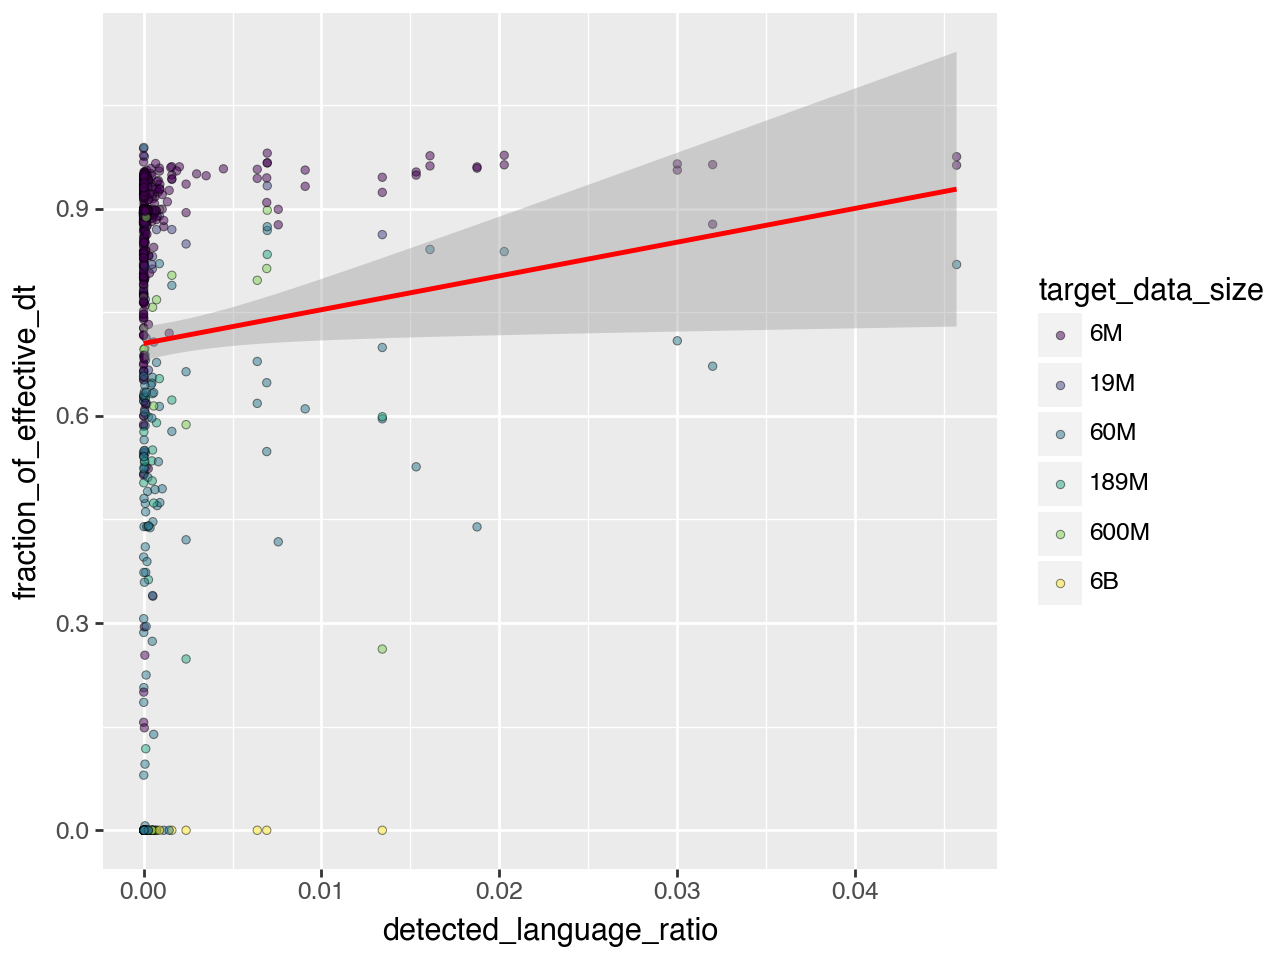

In [ ]:
(
    ggplot(dataset)
    + aes(x="detected_language_ratio", y="fraction_of_effective_dt")
    + geom_point(aes(fill="target_data_size"), stroke=0.2, alpha=0.5)
    + stat_smooth(method='lm', color='red')

)

We can, indeed observe a linear relationship, specially when the contamination is greater than 0.01.

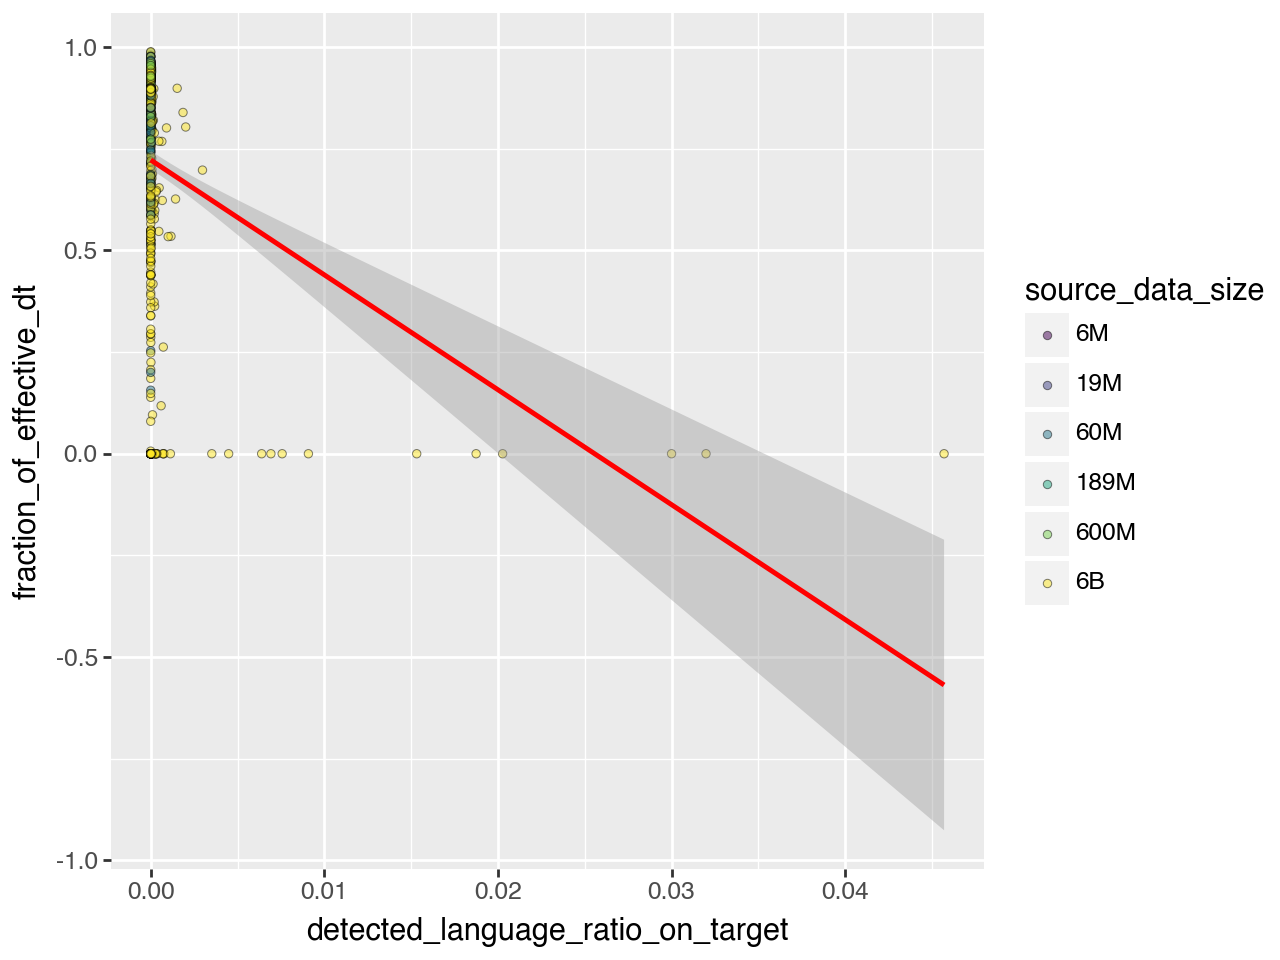

In [ ]:
(
    ggplot(dataset)
    + aes(x="detected_language_ratio_on_target", y="fraction_of_effective_dt")
    + geom_point(aes(fill="source_data_size"), stroke=0.2, alpha=0.5)
    + stat_smooth(method='lm', color='red')
)

The relationship between the number of sentences in the source language appearing in the target language training and data transfer is weak and negative. Interestingly, as more sentences appear, less transfer occurs, which is somewhat counterintuitive and warrants further investigation in future work.

For now, we focus on contamination in the source language dataset. We will conduct a hypothesis test with the following setup:

- **$H_0$ (Null Hypothesis):** No relationship exists between data transfer and contamination in the source language training.
- **$H_a$ (Alternative Hypothesis):** A relationship exists between data transfer and contamination in the source language training.
- **Test Statistic:** Pearson correlation between the two variables.
- **Test Type:** Permutation test.
- **Confidence Level:** 95%.

In [29]:
import numpy as np
from scipy.stats import permutation_test


def pearson_corr(x, y):
    return np.corrcoef(x, y, rowvar=False)[0, 1]


def run_permutation_test(x, y, statistic=pearson_corr, statistic_name="Pearson Correlation", confidence_level=0.95, chart_title="Null Hypothesis"):
    result = permutation_test((x, y), statistic, n_resamples=10_000, permutation_type="pairings")

    perm_df = pd.DataFrame({'perm_stats': result.null_distribution})

    lower_bound = np.percentile(result.null_distribution, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(result.null_distribution, (1 + confidence_level) / 2 * 100)

    chart = (
        ggplot(perm_df, aes(x='perm_stats')) +
        geom_histogram(binwidth=0.01, fill='blue', alpha=0.7, color='black') +
        geom_vline(xintercept=result.statistic, color='red', linetype='dashed', size=1) +
        geom_vline(xintercept=[lower_bound, upper_bound], color='green', linetype='dotted', size=1) +
        labs(title=chart_title,
            x=statistic_name,
            y='Frequency')
    )

    return result.statistic, result.pvalue, chart



x = dataset["detected_language_ratio"]
y = dataset["fraction_of_effective_dt"]

result = run_permutation_test(x, y)

print("Correlation:", result[0], ". p-value:", result[1])

Correlation: 0.08516906291862816 . p-value: 0.014798520147985201


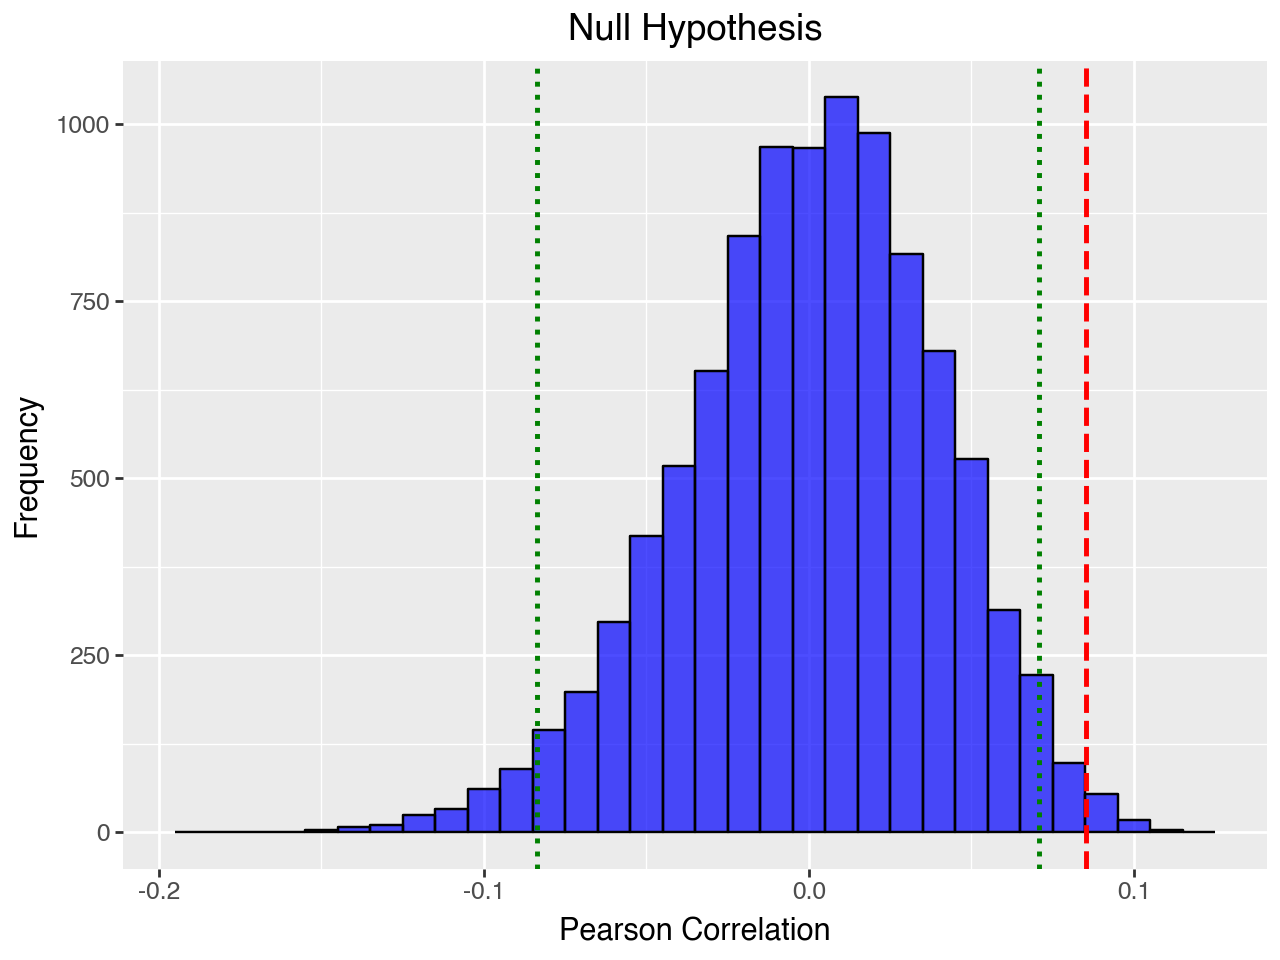

In [ ]:
result[2]

Per the results, we observe the the correlation between language contamination and the model's ability to use its source language to learn a target language are weakly correlatated (r = 0.085). However, since we observe a p-value outside our confidence interval (0.015), we can discard the null hypothesis of the variable not having any correlation. It seems, though, that Language Contamination plays a minor role in this transfer.

#### Language Distance

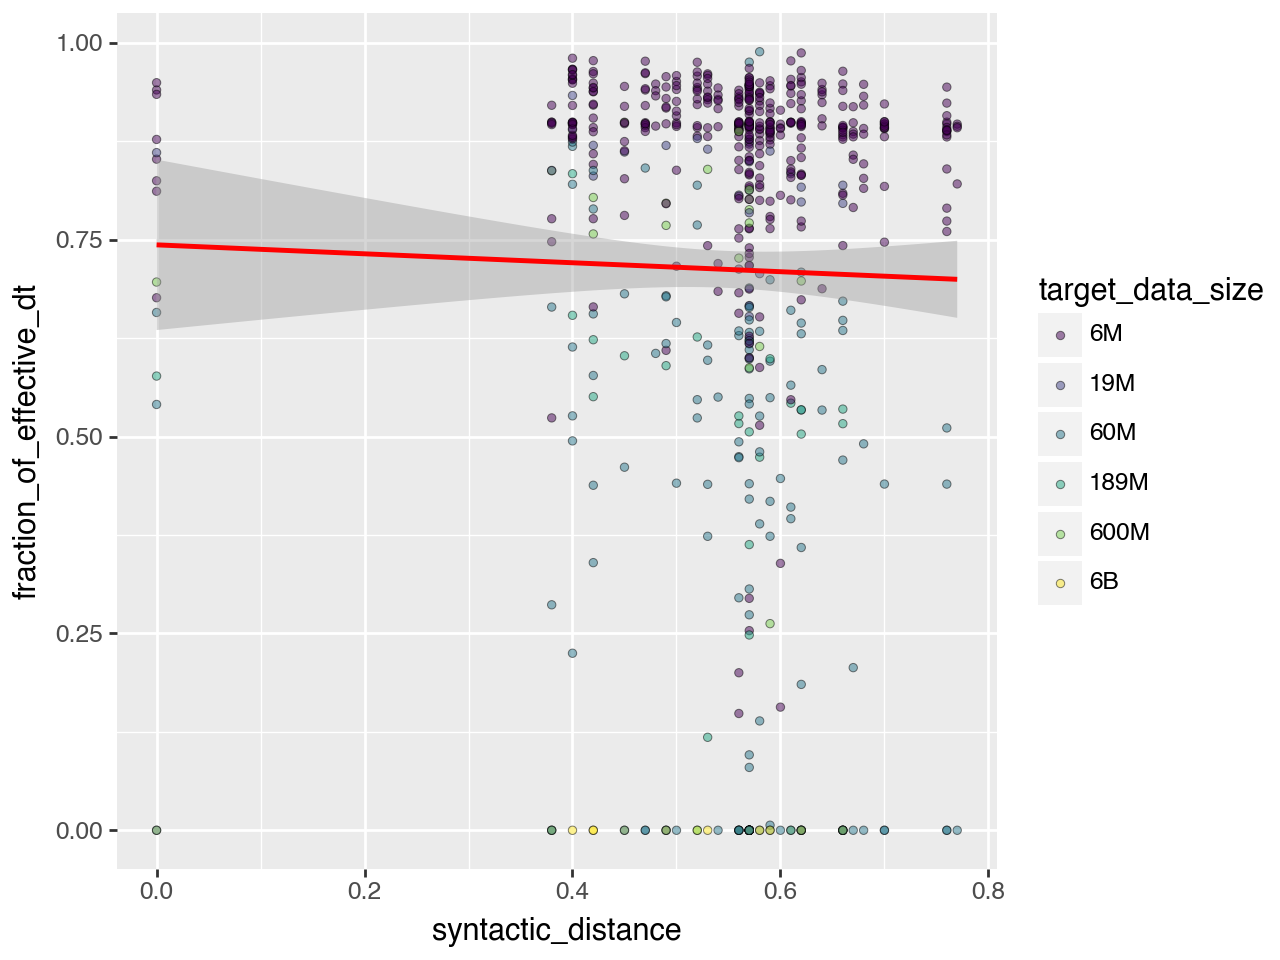

In [25]:
syntactic_plot = (
    ggplot(dataset)
    + aes(x="syntactic_distance", y="fraction_of_effective_dt")
    + geom_point(aes(fill="target_data_size"), stroke=0.2, alpha=0.5)
    + stat_smooth(method='lm', color='red')

)

geographic_plot = (
    ggplot(dataset)
    + aes(x="geographic_distance", y="fraction_of_effective_dt")
    + geom_point(aes(fill="target_data_size"), stroke=0.2, alpha=0.5)
    + stat_smooth(method='lm', color='red')

)

syntactic_plot

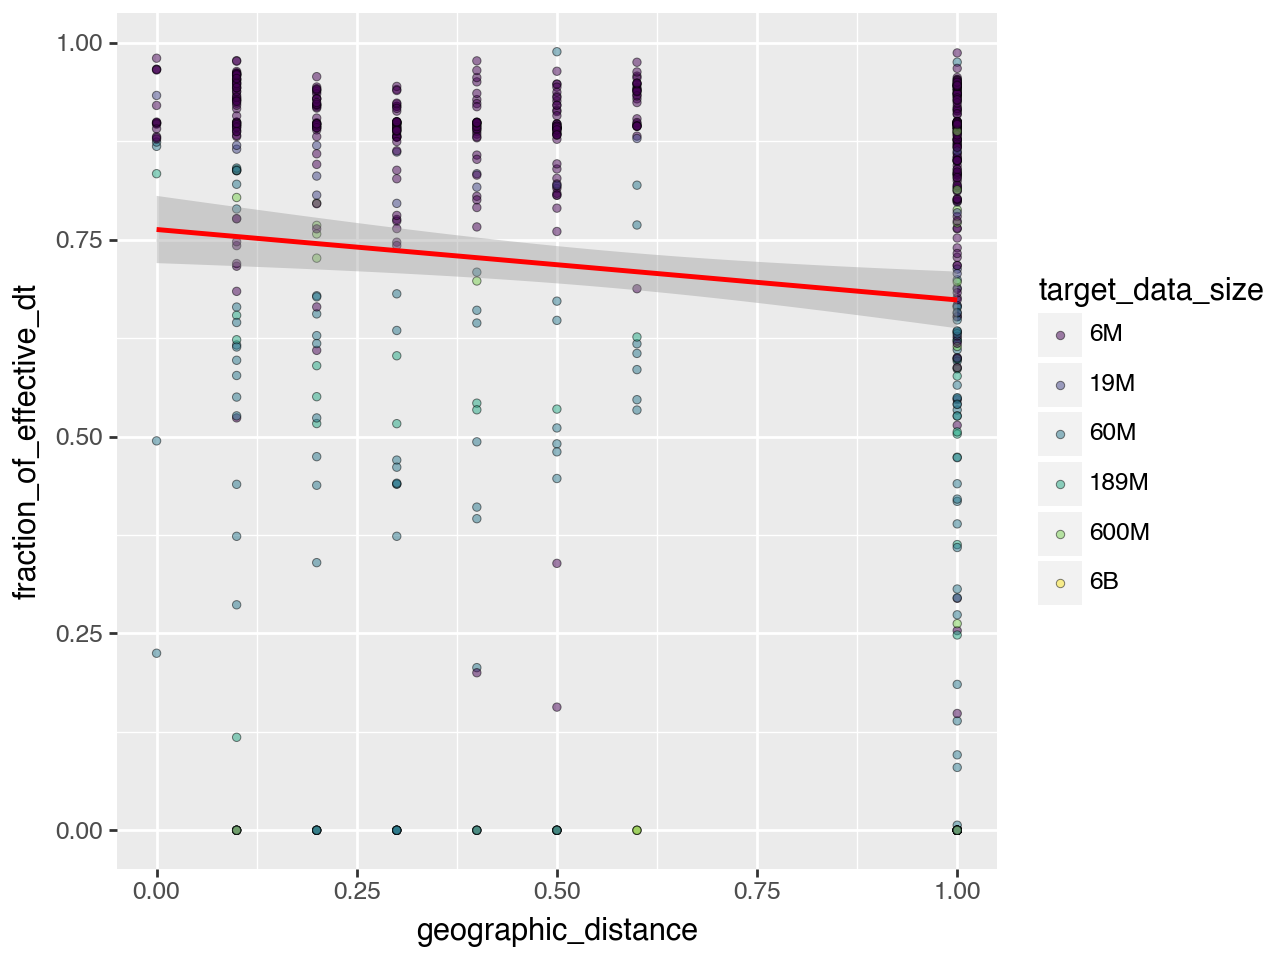

In [26]:
geographic_plot

For syntactic distances, the data appears to be heavily concentrated around values greater than 0.4. However, we observe data transfer values spanning the entire range, suggesting little to no relationship between syntactic distance and data transfer.

In contrast, for geographic distance, low data transfer values are more frequent when the distance is 1.0. Despite this observation, identifying a clear linear relationship remains challenging.

We will conduct a hypothesis test with the following setup:

- **$H_0$ (Null Hypothesis):** No relationship exists between data transfer and syntactic or gegraphic distances of source and target languages.
- **$H_a$ (Alternative Hypothesis):** A relationship exists between data transfer and syntactic or gegraphic distances of source and target languages.
- **Test Statistic:** Pearson correlation between the two variables.
- **Test Type:** Permutation test.
- **Confidence Level:** 95%.

In [30]:
x = dataset["syntactic_distance"]
y = dataset["fraction_of_effective_dt"]

result = run_permutation_test(x, y)

print("Correlation:", result[0], ". p-value:", result[1])

Correlation: -0.02301431797372261 . p-value: 0.5531446855314468


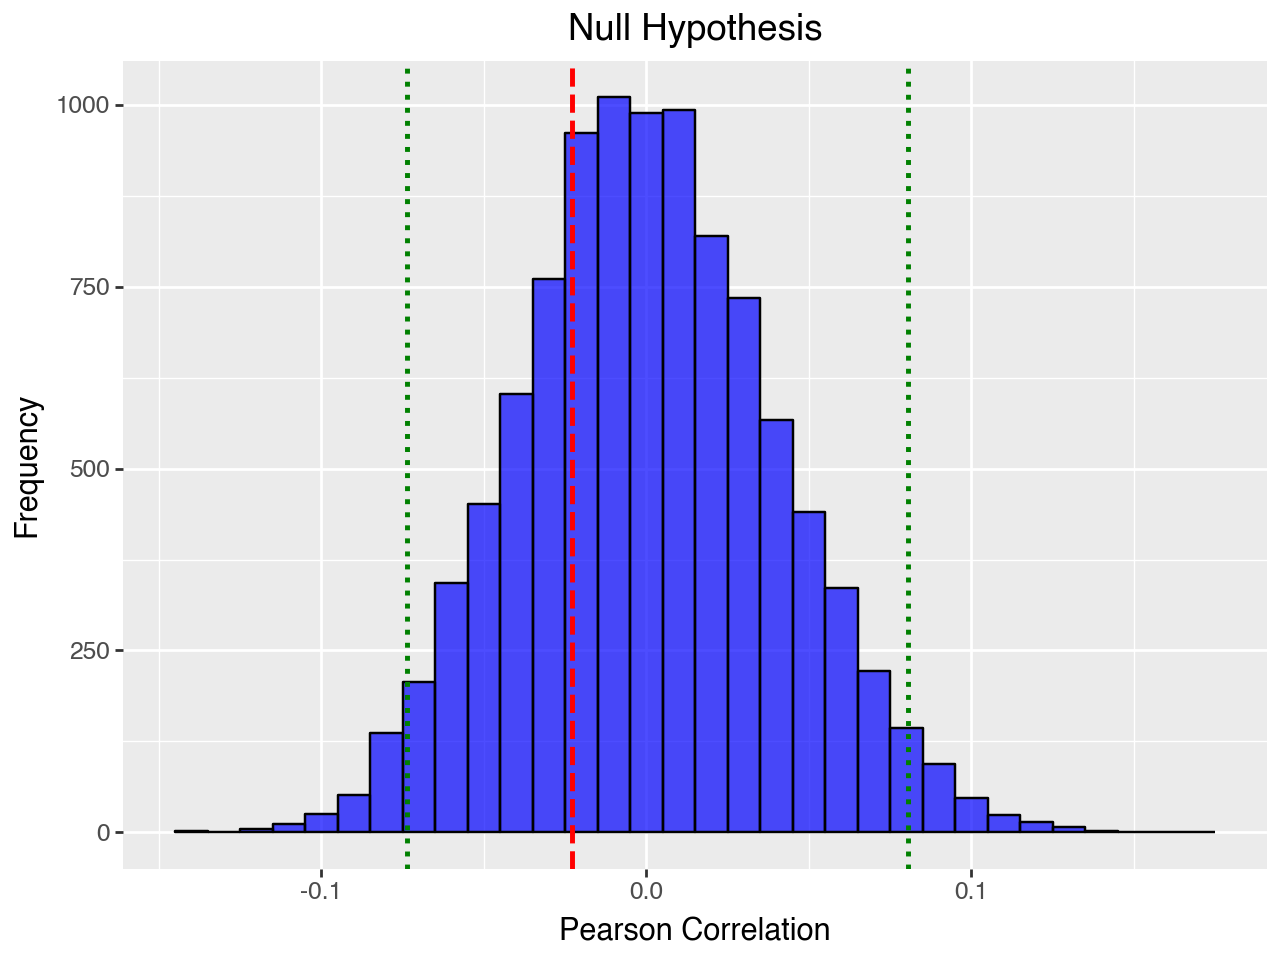

In [31]:
result[2]

In [32]:
x = dataset["geographic_distance"]
y = dataset["fraction_of_effective_dt"]

result = run_permutation_test(x, y)

print("Correlation:", result[0], ". p-value:", result[1])

Correlation: -0.11000911281101375 . p-value: 0.007599240075992401


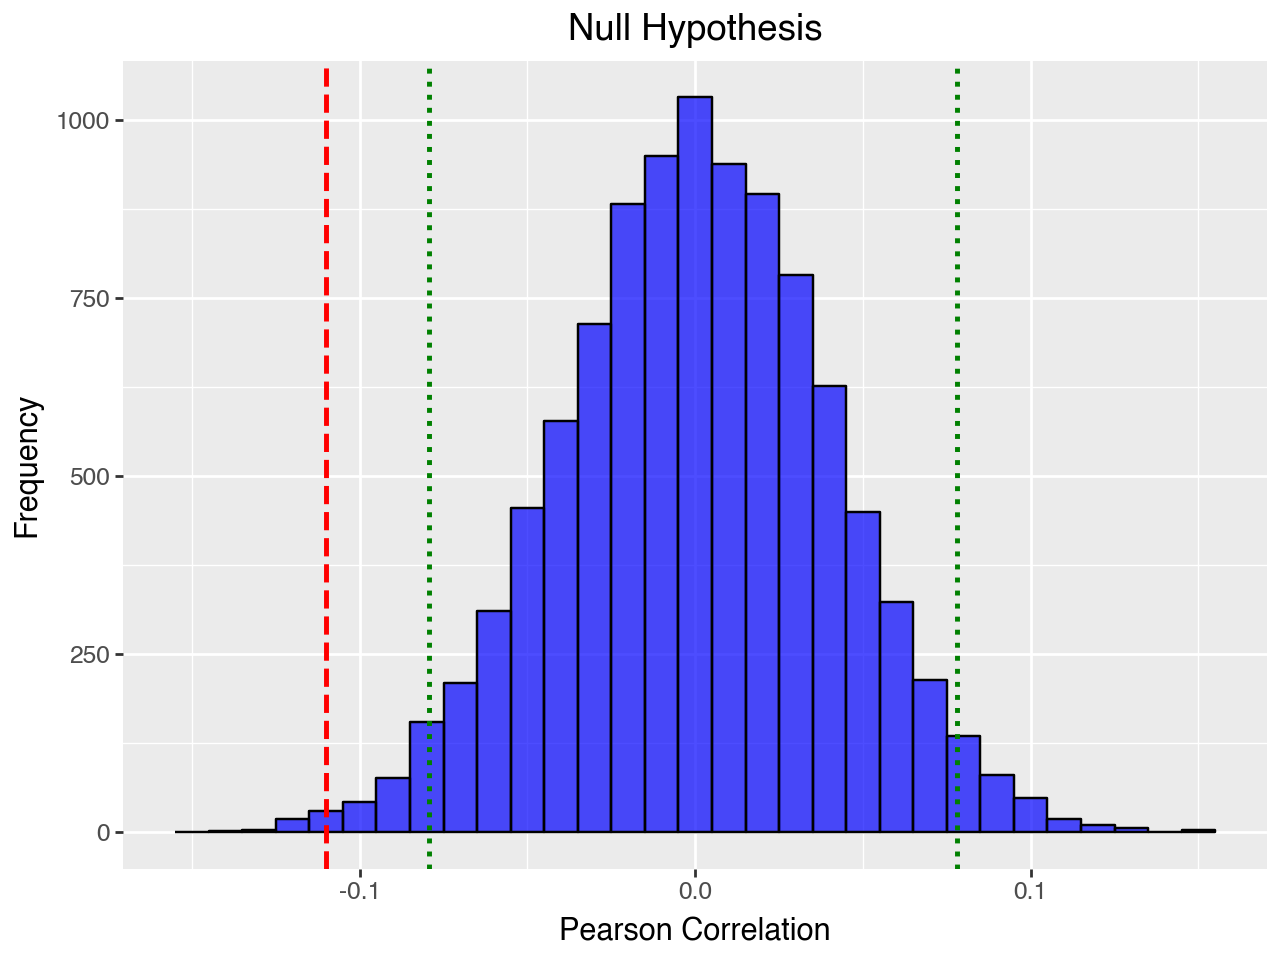

In [34]:
result[2]

In the hypothesis test for syntactic distance, we observe a low correlation between syntactic distance and data transfer. Additionally, the p-value (0.55) lies within the confidence interval, indicating that we fail to reject the null hypothesis. This suggests that there is insufficient evidence to support a significant relationship between syntactic distance and the model's ability to transfer knowledge across languages.

Conversely, for geographic distance, we find a weak negative correlation, suggesting that as geographic distance between languages increases, data transfer slightly decreases. Interestingly, the p-value (0.0075) lies outside the confidence interval, allowing us to reject the null hypothesis. This implies that, despite the weak correlation, geographic distance has a statistically significant relationship with data transfer, warranting further investigation into its role in cross-lingual transfer dynamics.

#### Script influence

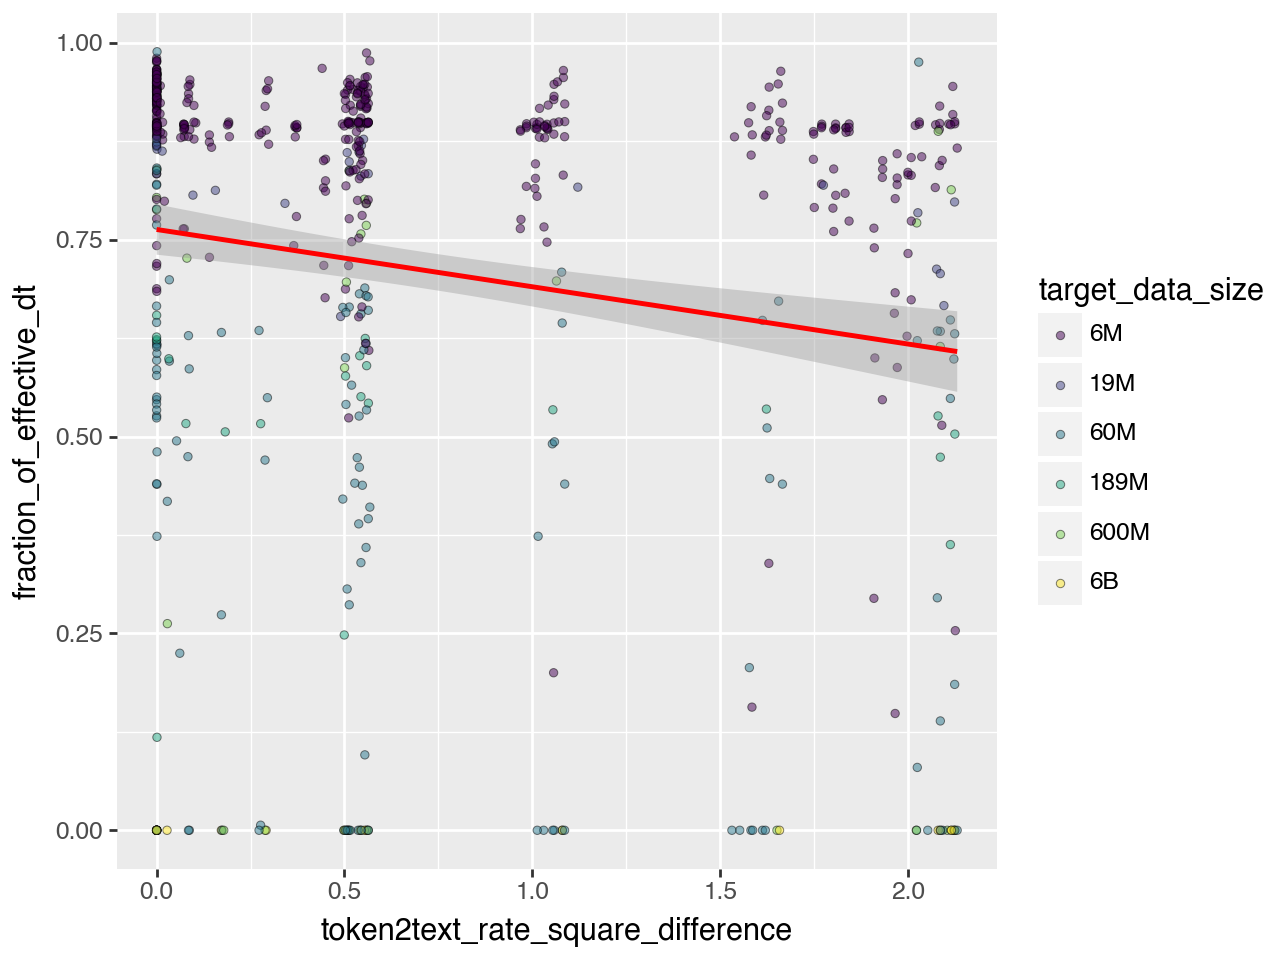

In [35]:
(
    ggplot(dataset)
    + aes(x="token2text_rate_square_difference", y="fraction_of_effective_dt")
    + geom_point(aes(fill="target_data_size"), stroke=0.2, alpha=0.5)
    + stat_smooth(method='lm', color='red')

)

The dispersion chart shows a weak negative correlation between `token2text_rate_square_difference` (script differences) and `fraction_of_effective_dt` (effective transfer). This trend suggests that as script differences increase, the model's ability to transfer knowledge diminishes slightly. However, the relationship is not strong, indicating that other factors likely contribute to the variability. Most data points are clustered around small `token2text_rate_square_difference` values (near 0.0), where the transfer effectiveness is generally high (close to 1.0). In contrast, larger differences (1.0–2.0) exhibit a wider spread in effectiveness, including cases with significantly reduced transfer efficiency.

Interestingly, the target data size, represented by color, does not show a clear trend, as all sizes are distributed throughout the plot with similar variability. Larger datasets (e.g., 600M, 6B) are less frequent but do not seem to consistently improve or hinder transfer. Some outliers with almost no effective transfer, even at low `token2text_rate_square_difference`, suggest that factors beyond script differences, such as dataset quality or linguistic structure, may play a role. Further investigation into these outliers and other linguistic features is recommended to understand the broader dynamics of transfer efficiency.

We set up the hypothesis test as follows:

- $H_0$ (Null Hypothesis): There is no significant relationship between token2text_rate_square_difference and fraction_of_effective_dt.
- $H_a$ (Alternative Hypothesis): There is a significant relationship between token2text_rate_square_difference and fraction_of_effective_dt.
- Test Statistic: Pearson correlation coefficient.
- Type of Test: Permutation test.
- Confidence Level: 95%.

In [36]:
x = dataset["token2text_rate_square_difference"]
y = dataset["fraction_of_effective_dt"]

result = run_permutation_test(x, y)

print("Correlation:", result[0], ". p-value:", result[1])

Correlation: -0.17585561870209968 . p-value: 0.00019998000199980003


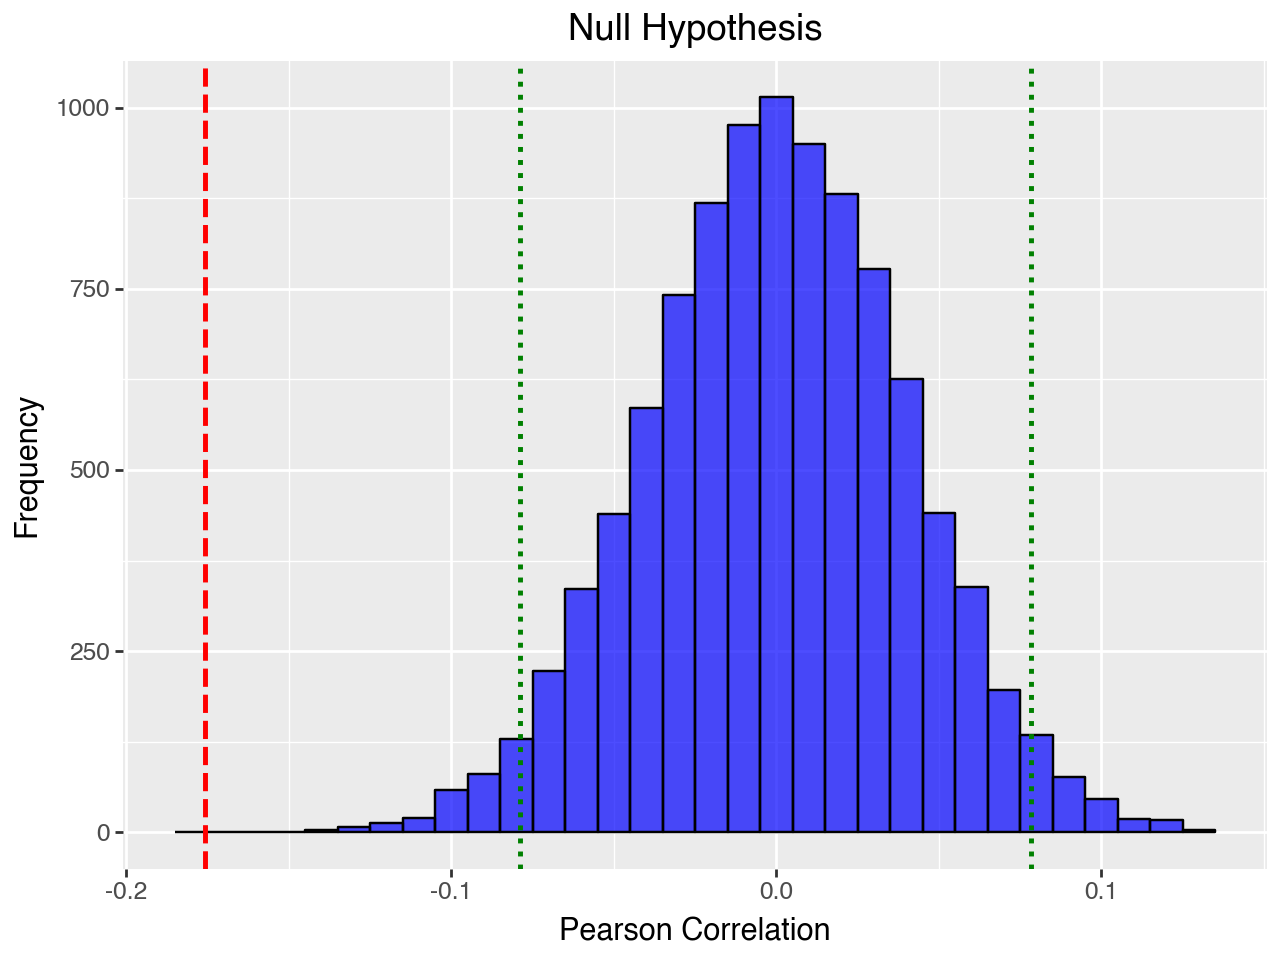

In [37]:
result[2]

The null hypothesis chart illustrates the relationship between `fraction_of_effective_dt` and `token2text_rate_square_difference`. The observed correlation is weakly negative (-0.176), suggesting that as script differences increase, the model's ability to transfer knowledge slightly decreases. The observed p-value (0.00019) lies well outside the 95% confidence interval, allowing us to reject the null hypothesis. This indicates that the negative relationship is statistically significant. However, the effect size is small, highlighting that while script differences play a role in transfer efficiency, their practical impact is limited.

#### Conclusion

The analysis reveals several insights into the factors affecting `fraction_of_effective_dt` (transfer efficiency). For `token2text_rate_square_difference` (script differences), the observed weak negative correlation (-0.176) suggests that as script differences increase, transfer efficiency slightly decreases. A hypothesis test confirmed the statistical significance of this relationship, with a p-value of 0.00019 allowing us to reject the null hypothesis. While the relationship is statistically significant, the small effect size indicates that script differences alone are not a major determinant of transfer efficiency.

For syntactic and geographic distances, the relationships were less clear. Syntactic distance showed a low correlation with a non-significant p-value (0.55), suggesting no substantial impact. Conversely, geographic distance exhibited a weak negative correlation, with a p-value (0.0075) outside the confidence interval, indicating a statistically significant, though minor, influence on transfer efficiency.

Overall, the findings highlight that while factors like script and geographic distances have measurable effects, their individual contributions are limited. Future research should consider interactions among these factors and explore additional linguistic and dataset-related variables to better understand the drivers of cross-lingual transfer efficiency.

## **References:**

- Lin, P., Hu, C., Zhang, Z., Martins, A. F. T., & Schütze, H. (2024). mPLM-Sim: Better Cross-Lingual Similarity and Transfer in Multilingual Pretrained Language Models. *Findings of the Association for Computational Linguistics: EACL 2024*, 276–310. 

- Blevins, T., & Zettlemoyer, L. (2022). Language Contamination Helps Explain the Cross-lingual Capabilities of English Pretrained Models. *Proceedings of the 2022 Conference on Empirical Methods in Natural Language Processing*, 3563–3574.

- De Souza, L. R., Almeida, T. S., Lotufo, R., & Nogueira, R. (2024). Measuring cross-lingual transfer in bytes. In Proceedings of the 2024 Conference of the North American Chapter of the Association for Computational Linguistics: Human Language Technologies (pp. 7526–7537). Association for Computational Linguistics. https://doi.org/10.18653/v1/2024.naacl-long.418

- Rust, P., Pfeiffer, J., Vulić, I., Ruder, S., & Gurevych, I. (2021). How good is your tokenizer? On the monolingual performance of multilingual language models. In Proceedings of the 59th Annual Meeting of the Association for Computational Linguistics and the 11th International Joint Conference on Natural Language Processing (Volume 1: Long Papers) (pp. 3118–3135). Association for Computational Linguistics. https://doi.org/10.18653/v1/2021.acl-long.243

